# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Muhammad Arfani Asra
- **Email:** arfani152@gmail.com
- **ID Dicoding:** arfaniasra

## Menentukan Pertanyaan Bisnis

Proyek ini menggunakan E-Commerce Public Dataset yang mencakup informasi pesanan, produk, pembayaran, dan kategori produk. Data ini memberikan gambaran menyeluruh tentang aktivitas belanja pelanggan dan aspek logistik yang terlibat dalam proses pengiriman.

1. Dataset Pesanan (`orders_dataset.csv`): Berisi data waktu pesanan, status pesanan, dan estimasi waktu pengiriman.

2. Dataset Item Pesanan (`order_items_dataset.csv`): Menyediakan detail harga dan biaya pengiriman untuk setiap item.

3. Dataset Produk (`products_dataset.csv`): Memuat informasi berat, dimensi, dan kategori produk.

4. Dataset Pembayaran (`order_payments_dataset.csv`): Menyediakan informasi metode pembayaran dan nilai transaksi.

5. Dataset Kategori Produk (`product_category_name_translations_dataset.csv`): Memetakan kategori produk ke bahasa Inggris untuk memudahkan analisis.

Dengan menggabungkan kelima dataset ini, proyek ini bertujuan untuk mengidentifikasi pola pembelian, preferensi pelanggan, serta hubungan antara atribut seperti berat produk, biaya pengiriman, dan metode pembayaran. Berdasarkan analisis awal, kami menyusun empat pertanyaan bisnis yang menjadi fokus utama analisis ini:

- Kategori produk mana yang paling sering dibeli oleh pelanggan?
- Pada bulan apa penjualan cenderung lebih tinggi?
- Apakah metode pembayaran tertentu cenderung menghasilkan nilai transaksi yang lebih tinggi?
- Apakah berat produk memengaruhi biaya pengiriman?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

- Memuat tabel `products`

In [2]:
products_df = pd.read_csv("https://raw.githubusercontent.com/ArfaniAsra/submission_analisis_data_dengan_python/refs/heads/main/datasets/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


- Memuat tabel `orders`

- Memuat tabel `order_items`

In [3]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/ArfaniAsra/submission_analisis_data_dengan_python/refs/heads/main/datasets/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/ArfaniAsra/submission_analisis_data_dengan_python/refs/heads/main/datasets/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


- Memuat tabel `orders_payment`

In [5]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/ArfaniAsra/submission_analisis_data_dengan_python/refs/heads/main/datasets/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


- Memuat tabel `product_category_name_translation`

In [6]:
product_category_name_translation_df = pd.read_csv("https://raw.githubusercontent.com/ArfaniAsra/submission_analisis_data_dengan_python/refs/heads/main/datasets/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### **Insight:**
- Dataset `order_items` berisi informasi detail tentang pesanan seperti: `product_id`, `seller_id`, `price`, dan `freight_value`.
- Dataset `products` mencakup atribut produk seperti: `product_category_name` dan dimesi produk (`length`, `height`, `width`).
- Dataset `product_category_name_translation` menerjemahkan nama kategori produk dari bahasa Portugis ke bahasa Inggris.
- Dataset `orders` berisi data terkait pesanan pelanggan seperti: `order_purchase_timestamp`, `order_status`, estimasi waktu pengiriman, dan waktu pengiriman aktual.
- Dataset `order_payments` mencakup informasi tentang metode pembayaran dan jumlah yang dibayarkan, meliputi `payment_type` dan `payment_value`.

### Assessing Data

#### Menilai Data `products_df`

In [7]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [8]:
# Check for missing values
products_df.isnull().sum()


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [9]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Penamaan yang tidak konsisten pada beberapa kolom `product_name_lenght` dan `product_description_lenght`.
- Nilai minimum yang tidak logis pada kolom `product_weight_g`, yaitu 0.
- Terdapat banyak **missing values** pada beberapa kolom dengan keterangan berikut:
  - Kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty` masing-masing memiliki 610 missing values.
  - Kolom metrik produk (`product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`) masing-masing memiliki 2 missing values.
- Tidak ada duplikasi baris.
- Dimensi produk (`product_length_cm`, `product_height_cm`, `product_width_cm`) memiliki value yang logis (contoh: Nilai minimum seperti panjang 7 cm, lebar 6 cm. Atau nilai maksimum seperti tinggi 105 cm, lebar 118 cm)

#### Menilai Data `orders_df`

In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [13]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Kolom yang merupakan tanggal atau timestamps perlu dikonversi menjadi tipe datetime.
- Terdapat banyak missing values pada kolom `order_approved_at`, `order_delivered_customer_date`, dan `order_estimated_delivery_date`

#### Menilai Data `order_items_df`

In [15]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
# Check for missing values
print(order_items_df.isnull().sum())

# Check for duplicate rows
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Jumlah duplikasi:  0


In [17]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Tidak terdapat missing values pada setiap kolom.
- Perlu memastikan tipe data yang sesuai untuk kolom `shipping_limit_date`.
- Kolom `order_item_id`: nilai minimum 1 & maksimum 21, menunjukkan bahwa beberapa pesanan mungkin memiliki lebih dari satu item.
- Kolom `price`: perlu diperiksa lebih lanjut untuk memastikan tidak ada data anomali.
- Kolom `freight_value`: nilai nol pada kolom ini perlu diperiksa.

#### Menilai Data `order_payments_df`

In [18]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [19]:
order_payments_df.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [20]:
order_payments_df['payment_type'].value_counts()

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


In [21]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Kolom `payment_sequential`, memiliki rentang 1 hingga 29 (menunjukkan beberapa pesanan memiliki banyak pembayaran, perlu dipahami lebih lanjut).
- Kolom `payment_installments`, memiliki rentang 0 hingga 24 (nilai 0 untuk cicilan perlu diperiksa).
- Kolom `payment_value`, memiliki rentang 0 hingga 13,664.08 (nilai 0 mungkin menunjukkan pembayaran gagal atau tidak sah).
- Kategori *not_defined* pada kolom `payment_type` perlu diperiksa untuk memastikan relevansi data.

#### Menilai Data `product_category_name_translation_df`

In [23]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [24]:
product_category_name_translation_df.isnull().sum()

,0
product_category_name,0
product_category_name_english,0


In [25]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
product_category_name_translation_df['product_category_name'].value_counts()

,count
product_category_name,
beleza_saude,1
alimentos,1
fashion_esporte,1
fashion_underwear_e_moda_praia,1
construcao_ferramentas_seguranca,1
...,...
malas_acessorios,1
cool_stuff,1
fashion_calcados,1


In [27]:
product_category_name_translation_df['product_category_name_english'].value_counts()

,count
product_category_name_english,
health_beauty,1
food,1
fashion_sport,1
fashion_underwear_beach,1
construction_tools_safety,1
...,...
luggage_accessories,1
cool_stuff,1
fashion_shoes,1


In [28]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Tipe data yang sesuai pada kedua kolom.
- Tidak ada missing values maupun duplikasi baris.

### Cleaning Data

#### Dataset `products_df`

- Penamaan Kolom yang Konsisten

In [29]:
products_df.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
}, inplace=True)


- Isi nilai kosong pada kolom-kolom deskriptif menggunakan media per kategori

In [30]:
# Handling missing values in descriptive columns using median per category
columns_to_fill = ['product_name_length', 'product_description_length', 'product_photos_qty']
for col in columns_to_fill:
    products_df[col] = products_df.groupby('product_category_name')[col].transform(
        lambda x: x.fillna(x.median())
    )

- Isi missing value pada `product_category_name` dengan "unknown"

In [31]:
# Filling missing product_category_name with 'unknown'
products_df['product_category_name'] = products_df['product_category_name'].fillna('unknown')

- Menghapus baris dengan nilai invalid atau 0 pada `product_weight`

In [32]:
# Removing rows with invalid or zero product weight
products_df = products_df[products_df['product_weight_g'] > 0]

In [33]:
# Dropping remaining rows with missing values (if any remain after targeted filling)
products_df = products_df.dropna()

In [34]:
# Re-check for missing values and duplicates after cleaning
final_missing_values = products_df.isnull().sum()
final_duplicate_rows = products_df.duplicated().sum()

print("Final Missing Values:")
print(final_missing_values)
print("\nFinal Duplicate Rows:", final_duplicate_rows)

Final Missing Values:
product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Final Duplicate Rows: 0


In [35]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32336 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32336 non-null  object 
 1   product_category_name       32336 non-null  object 
 2   product_name_length         32336 non-null  float64
 3   product_description_length  32336 non-null  float64
 4   product_photos_qty          32336 non-null  float64
 5   product_weight_g            32336 non-null  float64
 6   product_length_cm           32336 non-null  float64
 7   product_height_cm           32336 non-null  float64
 8   product_width_cm            32336 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [36]:
products_df.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32336.000000,32336.000000,32336.000000,32336.000000,32336.000000,32336.000000,32336.000000
mean,48.476249,771.522483,2.189108,2277.238248,30.854651,16.957818,23.207756
std,10.246261,635.158352,1.736844,4279.481580,16.957011,13.636665,12.079273
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [37]:
products_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


- Deteksi Outlier

In [38]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Check for outliers in numerical columns
outliers_weight = detect_outliers_iqr(products_df, 'product_weight_g')
outliers_length = detect_outliers_iqr(products_df, 'product_length_cm')
outliers_height = detect_outliers_iqr(products_df, 'product_height_cm')
outliers_width = detect_outliers_iqr(products_df, 'product_width_cm')

len(outliers_weight), len(outliers_length), len(outliers_height), len(outliers_width)


(4478, 1365, 1870, 897)

**Insight:**
- Mengatasi missing values pada kolom deskriptif (`product_name_length`, `product_description_length`, `product_photos_qty`) menggunakan nilai median berdasarkan `product_category_name`.
- Missing values pada kolom `product_category_name` diisi dengan nilai default 'unknown'.
- Baris dengan product_weight_g = 0 dihapus karena berat nol tidak logis.
- Distribusi berat produk berada dalam rentang 2 gram hingga 40425 gram, dengan dimensi produk (panjang, lebar, tinggi) yang wajar.
- Deteksi outlier menunjukkan banyak nilai ekstrem di kolom berat dan dimensi produk. Proses ini akan dianalisis lebih lanjut di tahap EDA.

#### Dataset `orders_df`

- Konversi kolom tanggal ke format datetime

In [39]:
# Convert timestamp columns to datetime
timestamp_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in timestamp_columns:
    orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')

- Mengecek kembali invalid value pada kolom-kolom bertipe datetime

In [40]:
# Check for invalid datetime conversions (null values after conversion)
invalid_timestamps = orders_df[timestamp_columns].isnull().sum()
invalid_timestamps

,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [41]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [42]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


- Semua kolom waktu telah berhasil dikonversi ke tipe datetime, tetapi ada nilai null yang tetap muncul karena merupakan missing values.
- Nilai kosong ini menunjukkan pesanan yang mungkin belum disetujui atau dikirim.

- Menangani missing values dengan mengecek `order_status`. Alasannya adalah jika misal status pesanan adalah canceled, berarti missing values itu mungkin valid. Sedangkan untuk pesanan aktif atau delivered, missing values perlu diinvestigasi lebih lanjut.

In [43]:
# Investigate missing values by order_status
missing_analysis = orders_df[orders_df['order_approved_at'].isnull()]['order_status'].value_counts()
missing_analysis

,count
order_status,
canceled,141
delivered,14
created,5


Ternyata sebagian besar missing values muncul pada pesanan dengan status:
 - canceled (141), valid karena tidak memerlukan tanggal persetujuan.
 - delivered (14), seharusnya memiliki tanggal persetujuan, ini anomali.
 - created (5), pesanan belum diproses, ini mungkin valid.

- Mengecek keakuratan tanggal, seperti:
  - `order_approved_at` harus selalu setelah `order_purchase_timestamp`
  - `order_delivered_customer_date` harus sebelum `order_estimated_delivery_date`.

In [44]:
# Verify logical sequence of dates
invalid_approval = orders_df[orders_df['order_approved_at'] < orders_df['order_purchase_timestamp']]
invalid_delivery = orders_df[orders_df['order_delivered_customer_date'] > orders_df['order_estimated_delivery_date']]

len(invalid_approval), len(invalid_delivery)

(0, 7827)

  - `order_approved_at` < `order_purchase_timestamp` sebanyak 0, menunjukkan semua tanggal persetujuan lebih besar dari tanggal pembelian (ini valid).

  - `order_delivered_customer_date` > `order_estimated_delivery_date` sebanyak 7287, memiliki tanggal pengiriman ke pelanggan yang melebihi estimasi pengiriman. Ini menunjukkan keterlambatan atau kesalahan data.

In [45]:
# Handle missing values for order_approved_at based on order_status
# Investigate the 14 'delivered' orders with missing approved dates
delivered_missing_approval = orders_df[(orders_df['order_status'] == 'delivered') & orders_df['order_approved_at'].isnull()]
delivered_missing_approval

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


`order_approved_at`:
  - Terdapat 14 pesanan dengan status delivered tetapi tidak memiliki tanggal persetujuan.
  - Pesanan ini tampaknya valid karena memiliki tanggal pengiriman dan estimasi pengiriman. Bisa jadi kesalahan input data.
`order_delivered_customer_date`:
  - Tetap memiliki 2965 missing values (termasuk pesanan yang belum terkirim atau dibatalkan).

In [46]:
# Create a column to flag late deliveries
orders_df['is_late'] = orders_df['order_delivered_customer_date'] > orders_df['order_estimated_delivery_date']

In [47]:
# Summary of late deliveries
late_delivery_summary = orders_df['is_late'].value_counts()
late_delivery_summary

,count
is_late,
False,91614
True,7827


  - Pembuatan kolom `is_late` dilakukan dengan memetakan 7827 pesanan terlambat dikirim dibandingkan estimasi pengiriman (`order_estimated_delivery_date`) dan 91614 pesanan dikirim tepat waktu.
  - Kolom ini akan digunakan untuk eksplorasi keterlambatan pengirim pada tahap EDA.

In [48]:
# Remaining missing values after flagging late deliveries
remaining_missing_values = orders_df.isnull().sum()
remaining_missing_values

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0
is_late,0


**Insight:**
- Semua kolom terkait tanggal berhasil dikonversi ke tipe datetime.
- Kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` memiliki missing values yang relevan untuk status tertentu:
  - Pesanan *canceled* tidak memiliki tanggal persetujuan atau pengiriman.
  - Pesanan aktif tanpa tanggal pengiriman mencerminkan pesanan yang belum selesai.
- Tidak ditemukan tanggal `order_approved_at` yang lebih awal dari `order_purchase_timestamp`.
- Sebanyak 7827 pesanan terlambat dibandingkan estimasi pengiriman, dan ini ditandai dalam kolom baru `is_late`. Sebagian besar pesanan tepat waktu.
- Ada 14 pesanan dengan status *delivered* tetapi tanpa `order_approved_at`. Ini akan diinvestigasi lebih lanjut.

#### Dataset `order_items_df`

- Konversi tipe data kolom `shipping_limit_date`

In [49]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], errors='coerce')
order_items_df['shipping_limit_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 112650 entries, 0 to 112649
Series name: shipping_limit_date
Non-Null Count   Dtype         
--------------   -----         
112650 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 880.2 KB


- Mengecek kembali konversi datetime yang tidak valid

In [50]:
# Check for any invalid datetime conversion
invalid_dates = order_items_df['shipping_limit_date'].isnull().sum()
print(f"Number of invalid datetime conversions: {invalid_dates}")

Number of invalid datetime conversions: 0


In [51]:
# Re-check unique order_item_id distribution
unique_order_items = order_items_df['order_item_id'].value_counts()
unique_order_items.unique()

array([98666,  9803,  2287,   965,   460,   256,    58,    36,    28,
          25,    17,    13,     8,     7,     5,     3,     1])

- Mengecek Anomali dan Melakukan Pembersihan pada Kolom `price` dan `freight_value`
  - Anomali yang diperhatikan meliputi: Nilai `freight_value` yang 0 (nol).
  - Harga `price` yang sangat tinggi (6735) dan sangat rendah (0.85) untuk memvalidasi relevansi data.

In [52]:
# Filter out rows with invalid prices (e.g., price <= 0)
order_items_df = order_items_df[order_items_df['price'] > 0]

# Filter out rows with invalid freight values (e.g., freight_value < 0)
order_items_df = order_items_df[order_items_df['freight_value'] >= 0]

# Re-check the descriptive statistics after cleaning
order_items_df.describe()


,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


- `price`: Semua nilai berada di atas 0. Nilai minimum tetap 0.85 dan maksimum tetap 6735. Ini menunjukkan tidak ada harga yang invalid, tetapi nilai tinggi perlu dipahami sebagai kemungkinan barang premium.
- `freight_value`: Semua nilai berada di rentang yang logis (≥ 0). Nilai nol menunjukkan potensi pengiriman gratis yang relevan.

In [53]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [54]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Tidak ditemukan duplikasi baris maupun missing values.
- Kolom `shipping_limit_date` dalam format datetime. Tidak ditemukan nilai tidak valid dalam tanggal batas pengiriman.
- Distribusi kolom `order_item_id` menunjukkan bahwa sebagian besar pesanan terdiri dari **1 item saja**, meskipun ada beberapa pesanan dengan hingga **21 item**.
- Kolom `price` memiliki rentang dari **0.85** hingga **6735.00**, mencerminkan variasi yang besar dalam harga produk. Nilai yang sangat tinggi kemungkinan mencerminkan produk premium.
- Terdapat beberapa nilai nol di kolom `freight_value`, yang mungkin mengindikasikan pengiriman gratis atau data yang tidak relevan.
- Semua kolom sudah berada dalam format yang sesuai dengan jenis datanya (`datetime`, `float`, `int`, dan `object`)


#### Dataset `order_payments_df`

- Periksa dan tangani `payment_installments` dengan nilai 0.

In [55]:
# Analyze rows with payment_installments = 0
installments_zero = order_payments_df[order_payments_df['payment_installments'] == 0]
installments_zero

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


- Periksa data dengan `payment_value` = 0

In [56]:
# Analyze rows with payment_value = 0
value_zero = order_payments_df[order_payments_df['payment_value'] == 0]
value_zero

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


- Periksa data dengan `payment_type` = *not_defined*

In [57]:
# Analyze rows with payment_type = 'not_defined'
not_defined_type = order_payments_df[order_payments_df['payment_type'] == 'not_defined']
not_defined_type

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


- Biarkan `payment_installments` = 0 karena jumlahnya kecil dan mungkin valid.
- Investigasi lebih lanjut `payment_value = 0 untuk memahami konteksnya.
- Pertahankan atau hapus baris dengan `payment_type` = *not_defined* tergantung relevansinya.

In [58]:
# Removing rows with 'not_defined' payment_type as they may not provide useful insights
order_payments_df = order_payments_df[order_payments_df['payment_type'] != 'not_defined']

In [59]:
# Re-check the cleaned dataset for missing values or inconsistencies
cleaned_missing_values = order_payments_df.isnull().sum()
cleaned_missing_values

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [60]:
cleaned_duplicate_rows = order_payments_df.duplicated().sum()
cleaned_duplicate_rows

0

In [61]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103883 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103883 non-null  object 
 1   payment_sequential    103883 non-null  int64  
 2   payment_type          103883 non-null  object 
 3   payment_installments  103883 non-null  int64  
 4   payment_value         103883 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


In [62]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103883.000000,103883.000000,103883.000000
mean,1.092681,2.853402,154.104831
std,0.706594,2.687071,217.495628
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.800000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.840000
max,29.000000,24.000000,13664.080000


**Insight:**
- Mayoritas transaksi menggunakan *credit_card*, diikuti oleh *boleto*, dan *voucher*
- Terdapat 9 baris dengan `payment_value` = 0. Nilai ini dipertahankan untuk analisis lebih lanjut.
- Sebagian besar pembayaran dilakukan dalam 1 cicilan atau tanpa cicilan, tetapi terdapat hingga 24 cicilan pada beberapa baris.
- Tidak ditemukan missing values atau duplikasi pada dataset setelah pembersihan.

#### Dataset `product_category_name_translation_df`

- Normalisasi teks. Pastikan kolom `product_category_name` dan `product_category_name_english` sudah seragam. Contohnya semua menggunakan huruf kecil, tanpa spasi berlebih, atau karakter khusus yang tidak perlu.

In [63]:
# Normalize text columns
product_category_name_translation_df['product_category_name'] = product_category_name_translation_df['product_category_name'].str.lower().str.strip()
product_category_name_translation_df['product_category_name_english'] = product_category_name_translation_df['product_category_name_english'].str.lower().str.strip()


- Mengecek nilai unik pada setiap kolom

In [64]:
product_category_name_translation_df['product_category_name'].unique()

array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

In [65]:
product_category_name_translation_df['product_category_name_english'].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [66]:
product_category_name_translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [67]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Insight:**
- Dataset ini menyediakan peta translasi yang lengkap antara nama kategori produk dalam bahasa asli dan bahasa Inggris.
- Tidak ada missing values atau duplikasi.

## Exploratory Data Analysis (EDA)

### Eksplorasi Data `products_df`

Hal-hal yang akan dieksplorasi meliputi:


1.   Memahami distribusi atribut numerik seperti:
      - `product_weight_g` (berat produk)
      - Dimensi produk (panjang, lebar, tinggi)
2.   Menganalisis distribusi kategori produk (`product_category_name`).
3.   Mendeteksi outliers pada atribut numerik.



In [68]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32336,32336,32336.000000,32336.000000,32336.000000,32336.000000,32336.000000,32336.000000,32336.000000
unique,32336,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476249,771.522483,2.189108,2277.238248,30.854651,16.957818,23.207756
std,NaN,NaN,10.246261,635.158352,1.736844,4279.481580,16.957011,13.636665,12.079273
min,NaN,NaN,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


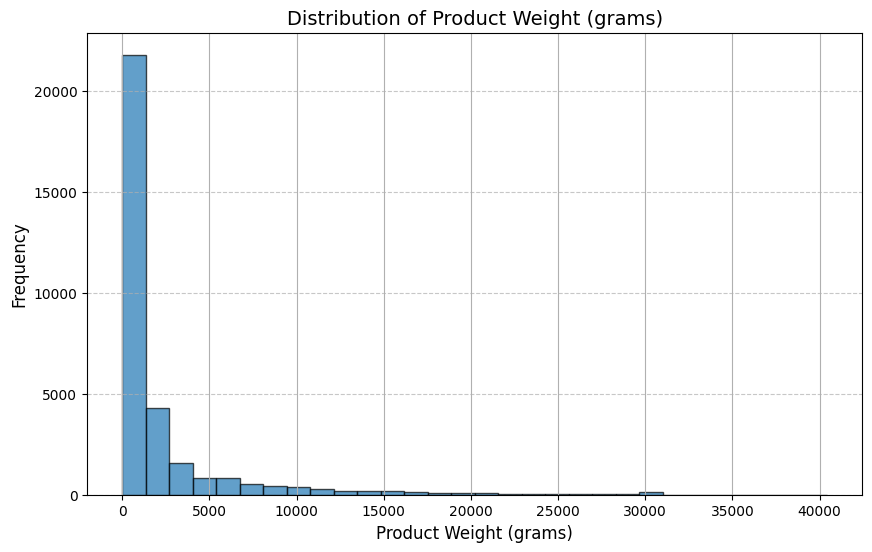

In [69]:
# Distribution of product_weight_g
plt.figure(figsize=(10, 6))
products_df['product_weight_g'].hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Product Weight (grams)', fontsize=14)
plt.xlabel('Product Weight (grams)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

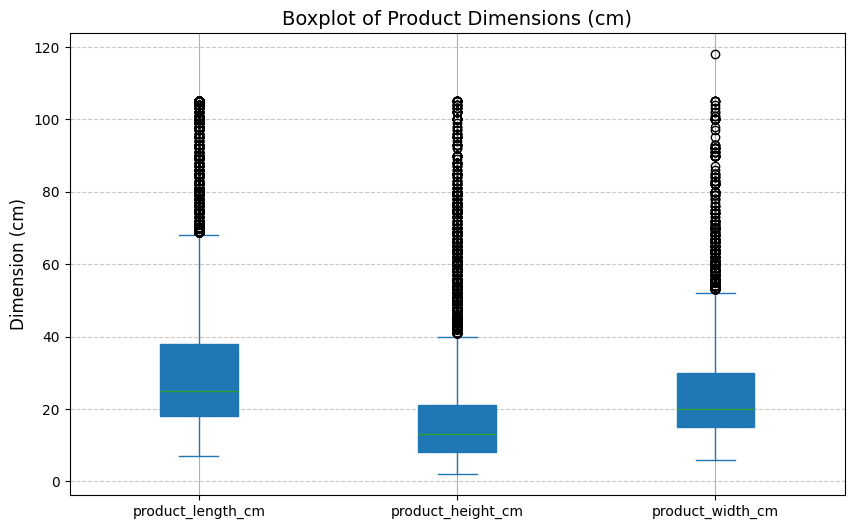

In [70]:
# Distribution of product dimensions (length, height, width)
plt.figure(figsize=(10, 6))
products_df[['product_length_cm', 'product_height_cm', 'product_width_cm']].plot(
    kind='box', figsize=(10, 6), grid=True, patch_artist=True, showfliers=True
)
plt.title('Boxplot of Product Dimensions (cm)', fontsize=14)
plt.ylabel('Dimension (cm)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Hasil Analisis Distribusi `products_df`**
1. Distribusi Berat Produk (`product_weight_g`):
  - Mayoritas produk memiliki berat dalam kisaran 0 - 5000 gram.
  - Ada beberapa produk dengan berat ekstrem (hingga lebih dari 40000 gram), yang perlu dianalisis lebih lanjut untuk validitasnya.
2. Distribusi Dimesi Produk:
  - Boxplot dimensi produk (panjang, tinggi, lebar) menunjukkan:
    - Sebagian besar produk memiliki dimensi wajar dalam kisaran 10 - 50 cm.
    - Terdapat outliers pada ketiga dimensi (panjang, tinggi, dan lebar) yang melampaui 100 cm.


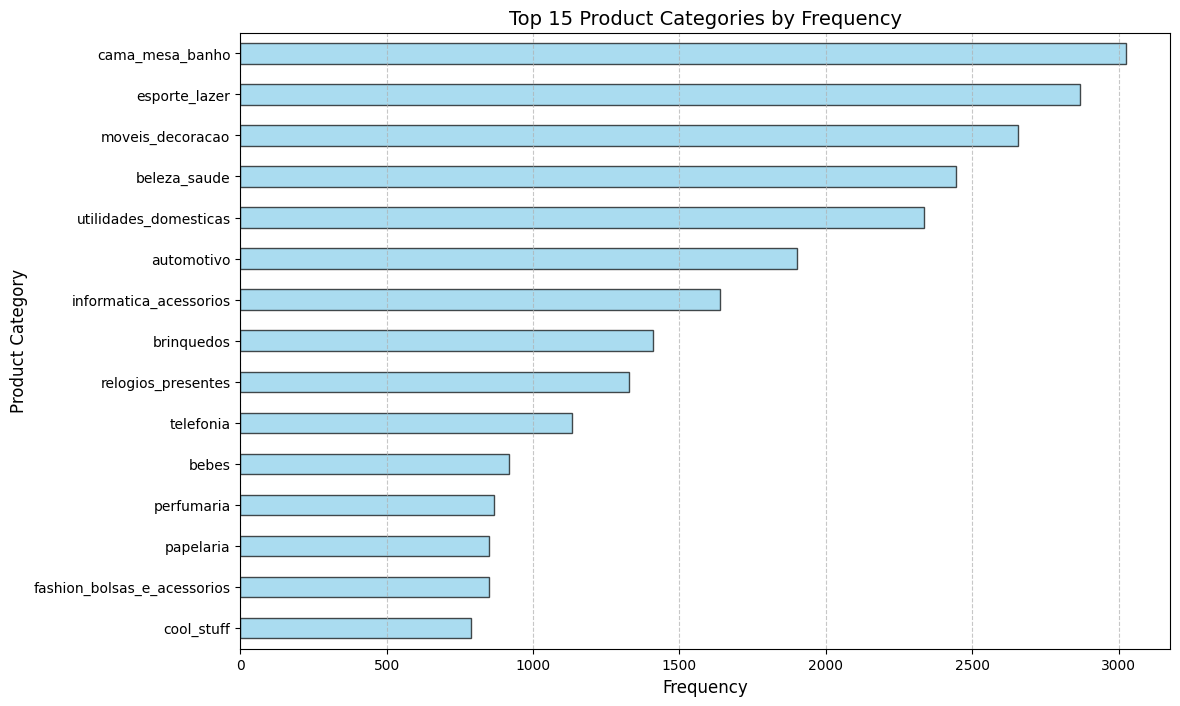

In [71]:
# Distribution of product_category_name
plt.figure(figsize=(12, 8))
products_df['product_category_name'].value_counts().head(15).plot(
    kind='barh', color='skyblue', edgecolor='black', alpha=0.7
)
plt.title('Top 15 Product Categories by Frequency', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Distribusi Kategori Produk (`product_category_name`)**
1. Kategori Populer:
  - Beberapa kategori produk yang paling sering muncul adalah:
    - `came_mesa_banho` (bed, table, bath)
    - `beleza_saude` (beauty and health)
    - `esporte_lazer` (sports and leisure)
  - Ini menunjukkan fokus penjualan pada kebutuhan rumah tangga, kecantikan, dan olahraga.
2. Konsentrasi:
  - Sebagian besar frekuensi terkonsentrasi pada beberapa kategori utama, dengan kategori lainnya relatif kurang dominan.

### Eksplorasi Data `orders_df`

Hal-hal yang akan dieksplorasi adalah:
1. Memahami pola dan distribusi waktu dari pesanan.
2. Menganalisis status pesanan (`order_status`) dan distribusi keterlambatan pengiriman (`is_late`).
3. Mengidentifikasi pola terkait estimasi waktu pengiriman.

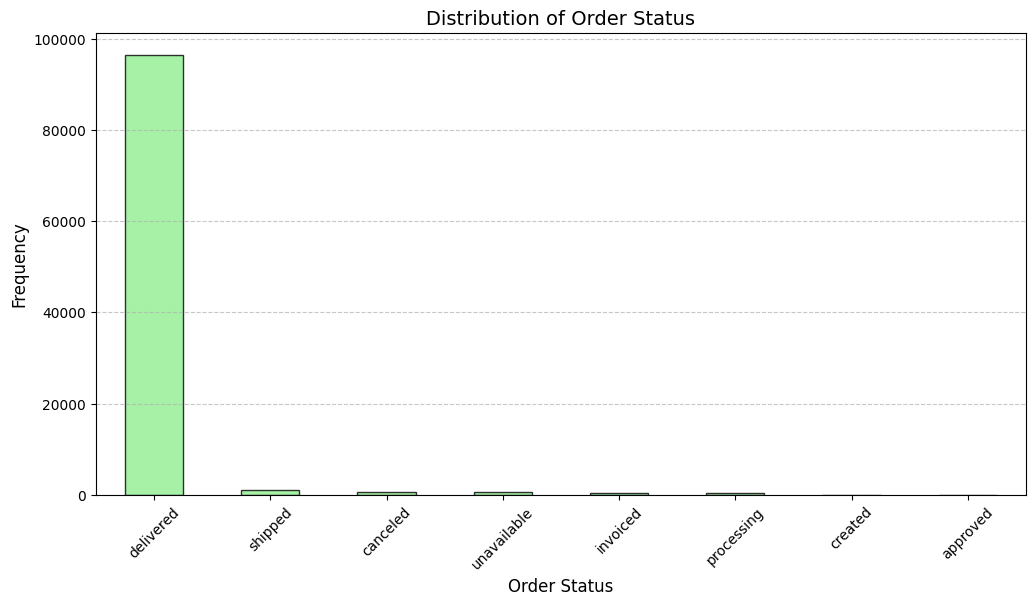

In [72]:
# Analyze order_status distribution
plt.figure(figsize=(12, 6))
orders_df['order_status'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black', alpha=0.8)
plt.title('Distribution of Order Status', fontsize=14)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Hasil Distribusi Status Pesanan (`order_status`)**
1. Mayoritas Pesanan:
  - Status *delivered* mendominasi dataset, menunjukkan sebagian besar pesanan berhasil dikirim.
  - Status lain yang signifikan adalah *shipped* dan *canceled*, yang menunjukkan proses pengiriman atau pembatalan.
2. Proporsi Status Minor:
  - Status seperti *unavailable* dan *invoiced* jarang terjadi, mencerminkan kasus-kasus khusus atau kesalahan input data.


Selanjutnya, menganalisis **distribusi waktu pesanan** menggunakan kolom `order_purchase_timestamp`.

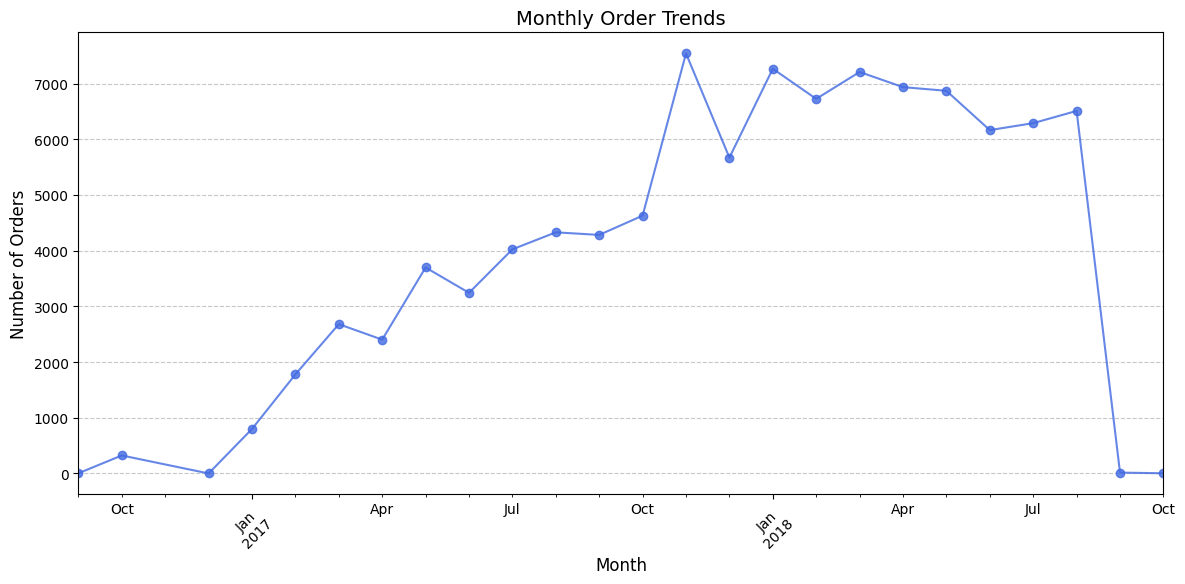

In [73]:
# Analyze distribution of order_purchase_timestamp (monthly trends)
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

plt.figure(figsize=(14, 6))
orders_df['order_month'].value_counts().sort_index().plot(
    kind='line', marker='o', linestyle='-', color='royalblue', alpha=0.8
)
plt.title('Monthly Order Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Hasil Analisis Tren Pesanan Bulanan**
1. Pola Waktu Pesanan:
  - Pesanan menunjukkan tren **meningkat** secara keseluruhan hingga pertengahan 2018.
  - Lonjakan pesanan terlihat di beberapa bulan, yang mungkin terkait dengan promosi atau musim tertentu.
2. Penurunan Akhir Waktu:
  - Ada penurunan pesanan pada bulan-bulan terakhir dataset, yang mungkin disebabkan oleh data yang tidak lengkap atau penurunan aktivitas.

Selanjutnya, menganalisis keterlambatan pengiriman. Tujuan melakukan ini adalah memahami frekuensi keterlambatan pengiriman dan mengidentifikasi pola waktu terkait keterlambatan (bulanan atau musiman).

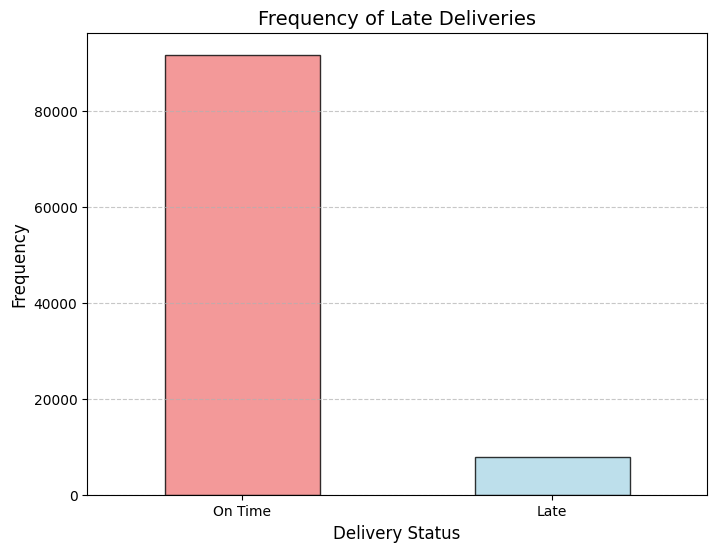

In [74]:
# Analyze frequency of late deliveries
plt.figure(figsize=(8, 6))
orders_df['is_late'].value_counts().plot(
    kind='bar', color=['lightcoral', 'lightblue'], edgecolor='black', alpha=0.8
)
plt.title('Frequency of Late Deliveries', fontsize=14)
plt.xticks([0, 1], ['On Time', 'Late'], rotation=0)
plt.xlabel('Delivery Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Hasil Analisis Frekuensi Keterlambatan Pengiriman**
1. Sebagian Besar Pesanan Tepat Waktu:
  - Mayoritas pesanan dikirim tepat waktu (label "On Time").
  - Pesanan terlambat (`is_late` = True) berjumlah signifikan, namun lebih rendah dibandingkan pesanan yang tepat waktu.
2. Potensi Masalah Keterlambatan:
  - Frekuensi keterlambatan cukup signifikan untuk dianalisis lebih mendalam, terutama dalam konteks waktu dan kategori pesanan.

Melihat **tren keterlambatan pengiriman secara waktu** (bulanan) untuk memahami apakah ada pola musiman atau tren waktu.

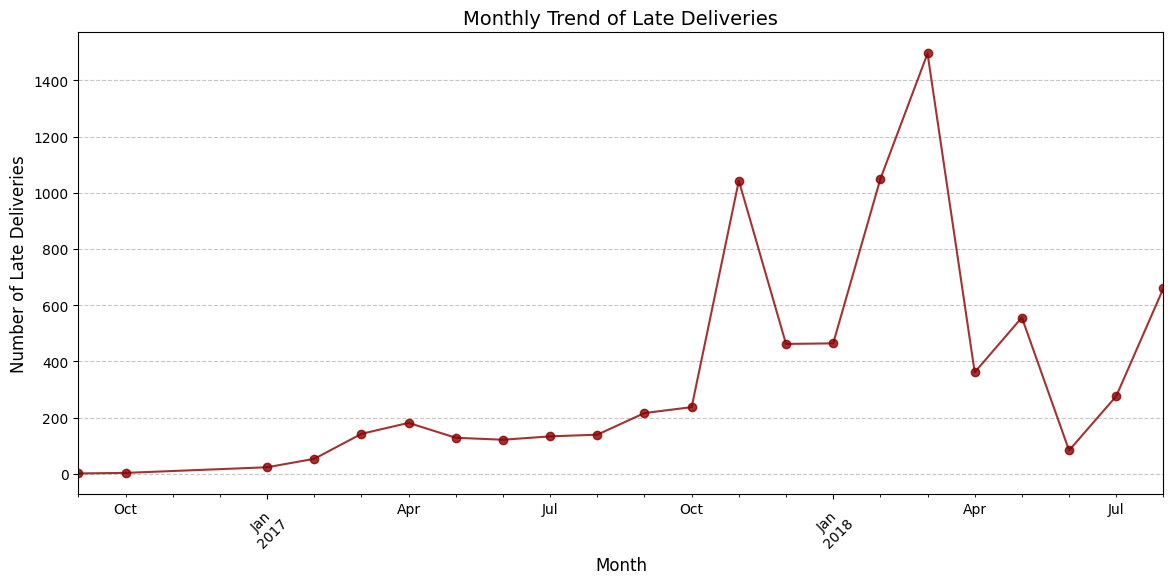

In [75]:
# Analyze monthly trends for late deliveries
late_deliveries_monthly = orders_df[orders_df['is_late']].groupby('order_month')['is_late'].count()

plt.figure(figsize=(14, 6))
late_deliveries_monthly.plot(
    kind='line', marker='o', linestyle='-', color='darkred', alpha=0.8
)
plt.title('Monthly Trend of Late Deliveries', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Late Deliveries', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Hasil Analisis Tren Bulanan Keterlambatan Pengiriman**
1. Fluktuasi Keterlambatan:
  - Tren keterlambatan pengiriman berfluktuasi setiap bulan.
  - Beberapa bulan memiliki jumlah keterlambatan yang lebih tinggi, yang mungkin terkait dengan lonjakan pesanan atau kendala logistik musiman.
2. Keterlambatan yang Konsisten:
  - Meskipun ada variasi, keterlambatan terjadi secara konsisten setiap bulan, menunjukkan ini adalah fenomena yang tidak bisa diabaikan.

### Eksplorasi Data `order_items_df`

Hal-hal yang akan dieksplorasi memiliki tujuan:
1. Memahami distribusi harga (`price`) dan biaya pengiriman (`freight_value`).
2. Menganalisis hubungan antara berat produk (`product_weight_g`, dari integrasi dengan `products_df`) dan biaya pengiriman.
3. Mengidentifikasi outliers pada kolom numerik.

**Distribusi Harga dan Biaya Pengiriman**

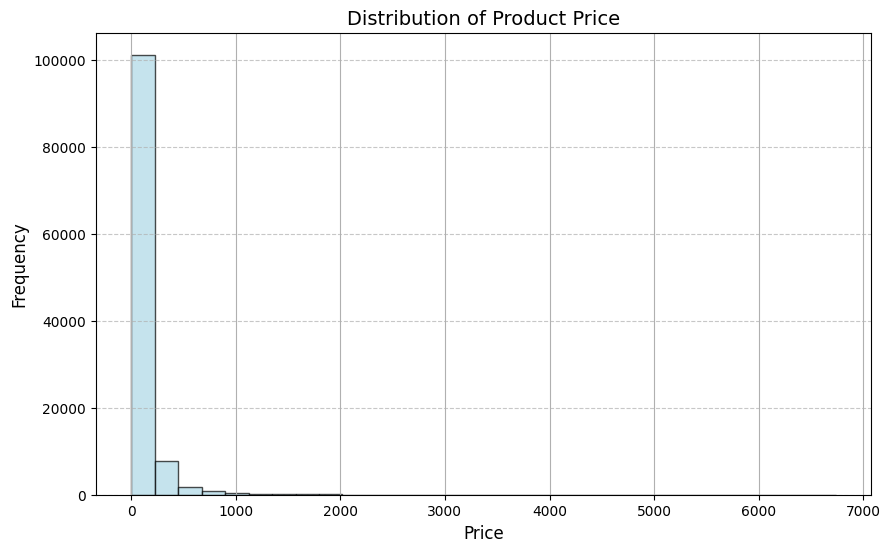

In [76]:
# Analyze distribution of price
plt.figure(figsize=(10, 6))
order_items_df['price'].hist(bins=30, edgecolor='black', alpha=0.7, color='lightblue')
plt.title('Distribution of Product Price', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

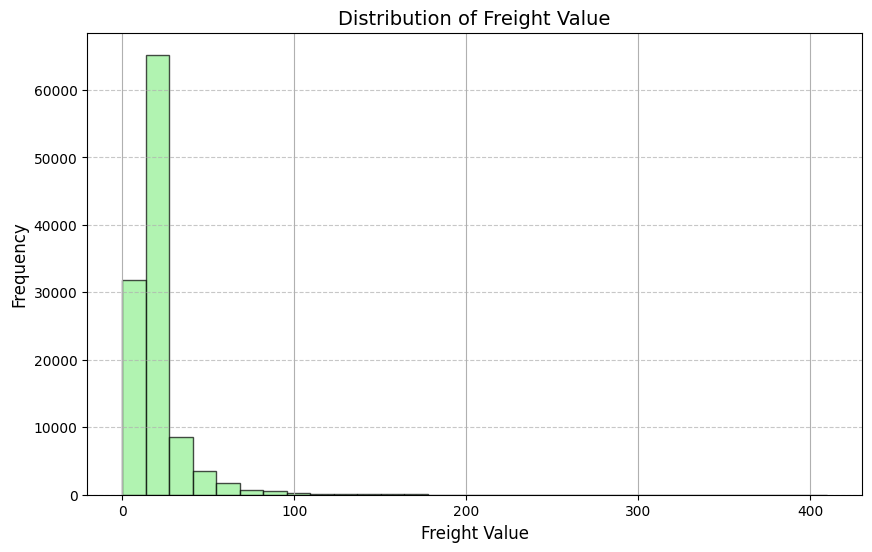

In [77]:
# Analyze distribution of freight_value
plt.figure(figsize=(10, 6))
order_items_df['freight_value'].hist(bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Distribution of Freight Value', fontsize=14)
plt.xlabel('Freight Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Hasil Analisis Distribusi `order_items_df`**
1. Distribusi Harga (`price`):
  - Harga produk tersebar luas, dengan mayoritas berada di bawah 500 BRL.
  - Terdapat beberapa produk dengan harga sangat tinggi, yang merupakan outliers dan dapat dianalisis lebih lanjut.
2. Distribusi Biaya Pengiriman (`freight_value`):
  - Sebagian besar biaya pengiriman berada dalam rentang 0 - 50 BRL.
  - Ada beberapa nilai ekstrem, dengan biaya pengiriman mencapai lebih dari 200 BRL, yang perlu divalidasi.

### Eksplorasi Data `order_payments_df`

Hal-hal yang akan dieksplorasi bertujuan untuk:
1. Memahami distrbusi metode pembayaran (`payment_type`) dan cicilan (`payment_installments`).
2. Menganalisis distribusi nilai transaksi (`payment_value`).
3. Mendeteksi outliers pada kolom numerik seperti `payment_value` dan `payment_installments`.

**Distribusi Metode Pembayaran**

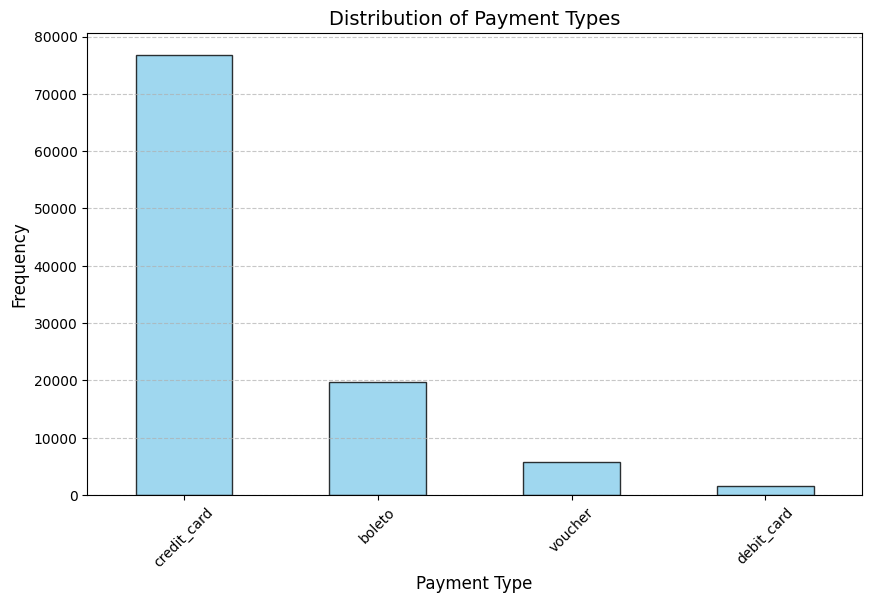

In [78]:
# Analyze distribution of payment_type
plt.figure(figsize=(10, 6))
order_payments_df['payment_type'].value_counts().plot(
    kind='bar', color='skyblue', edgecolor='black', alpha=0.8
)
plt.title('Distribution of Payment Types', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Hasil Distribusi Metode Pembayaran (`payment_type`)**
1. Metode Pembayaran Populer:
  - `credit_card` adalah metode pembayaran yang paling sering digunakan, diikuti oleh `boleto` (metode pembayaran populer di Brasil) dan `voucher`.
2. Metode Pembayaran Minor:
  - `debit_card` memiliki frekuensi yang jauh lebih kecil dibandingkan metode lainnya.

Selanjutnya, menganalisis distribusi kolom numerik seperti:
1. Cicilan Pembayaran (`payment_installments`).
2. Nilai Transaksi (`payment_value`)

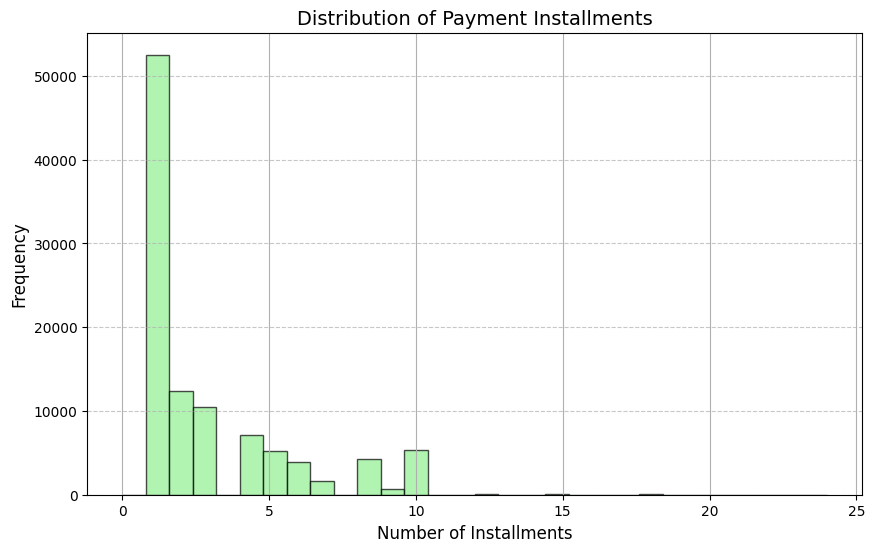

In [79]:
# Analyze distribution of payment_installments
plt.figure(figsize=(10, 6))
order_payments_df['payment_installments'].hist(bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Distribution of Payment Installments', fontsize=14)
plt.xlabel('Number of Installments', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Hasil Distribusi Cicilan Pembayaran (`payment_installments`)**
1. Mayoritas Pembayaran:
  - Sebagian besar pembayaran dilakukan dalam 1 cicilan (pembayaran penuh).
  - Cicilan 2 hingga 10 juga cukup umum, menunjukkan banyak pelanggan memilih opsi pembayaran cicilan.
2. Cicilan Ekstrem:
  - Ada beberapa pembayaran dengan jumlah cicilan tinggi (lebih dari 20), yang mungkin merupakan outliers atau kesalahan input data.

Selanjutnya, menganalisis distribusi nilai transaksi (`payment_value`) untuk memahami pola dan mendeteksi potensi outliers.

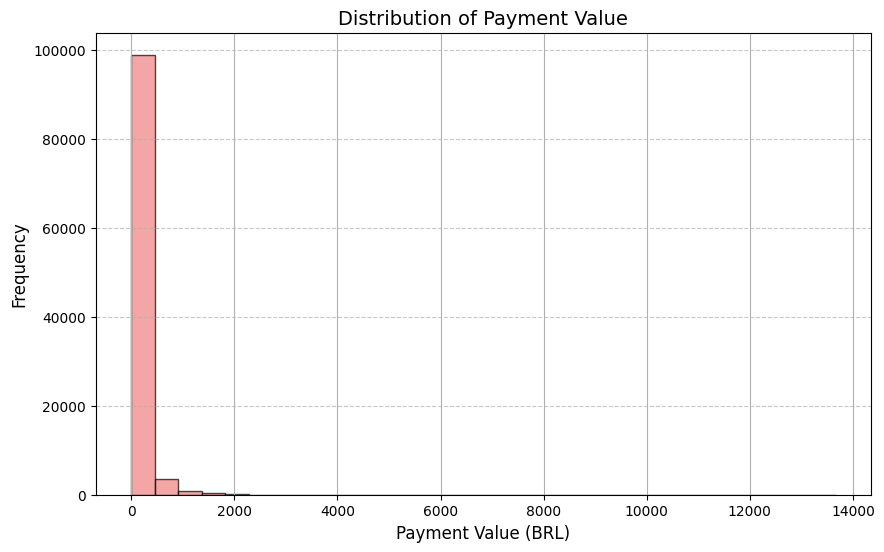

In [80]:
# Analyze distribution of payment_value
plt.figure(figsize=(10, 6))
order_payments_df['payment_value'].hist(bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
plt.title('Distribution of Payment Value', fontsize=14)
plt.xlabel('Payment Value (BRL)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Hasil Distribusi Nilai Transaksi (payment_value)**
1. Mayoritas Transaksi:
  - Nilai transaksi sebagian besar terkonsentrasi di bawah 500 BRL, dengan puncak di sekitar 100 BRL.
2. Nilai Ekstrem:
  - Terdapat beberapa transaksi dengan nilai sangat tinggi (di atas 10000 BRL), yang merupakan outliers dan perlu divalidasi lebih lanjut.

### Eksplorasi Data `orders_df` dan `order_items_df`

In [81]:
# Merge datasets
orders_items_merged = pd.merge(order_items_df, orders_df, on='order_id', how='inner')

# Analyze total items per order
items_per_order = orders_items_merged.groupby('order_id').size()

# Analyze total price per order
total_price_per_order = orders_items_merged.groupby('order_id')['price'].sum()

# Display descriptive statistics for items and total price per order
items_stats = items_per_order.describe()
price_stats = total_price_per_order.describe()

items_stats, price_stats

(count    98666.000000
 mean         1.141731
 std          0.538452
 min          1.000000
 25%          1.000000
 50%          1.000000
 75%          1.000000
 max         21.000000
 dtype: float64,
 count    98666.000000
 mean       137.754076
 std        210.645145
 min          0.850000
 25%         45.900000
 50%         86.900000
 75%        149.900000
 max      13440.000000
 Name: price, dtype: float64)

**Hasil Analisis Awal dari Penggabungan `orders_df` dan `order_items_df`**

1. **Jumlah Item per Pesanan:**
  - Rata-rata: **1.14 item per pesanan**, dengan mayoritas pesanan hanya memiliki 1 item.
  - Pesanan dengan jumlah item tertinggi mencapai 21 item.
2. **Harga Total per Pesanan:**
  - Rata-rata: **137.75 BRL per pesanan**.
  - Harga total tertinggi dalam satu pesanan mencapai **13,440 BRL** (kemungkinan produk premium atau jumlah besar).

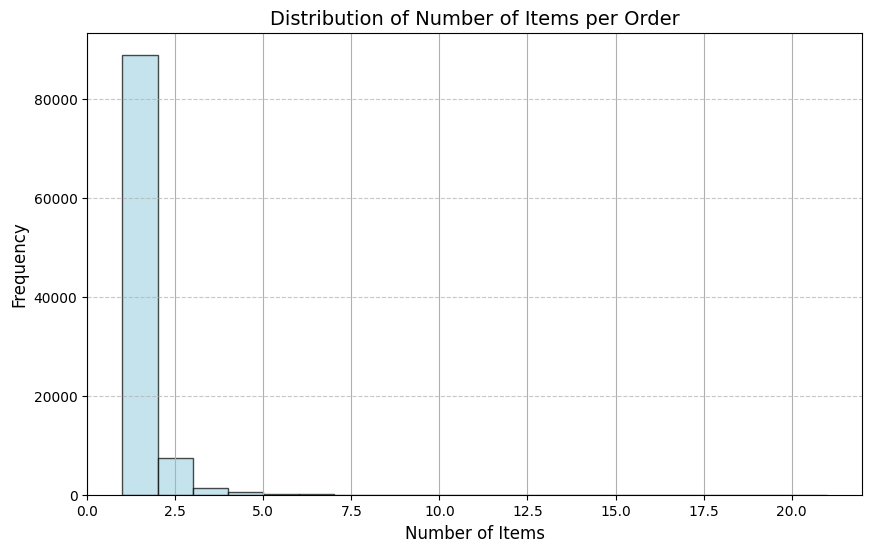

In [82]:
# Visualize distribution of items per order
plt.figure(figsize=(10, 6))
items_per_order.hist(bins=20, edgecolor='black', alpha=0.7, color='lightblue')
plt.title('Distribution of Number of Items per Order', fontsize=14)
plt.xlabel('Number of Items', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


1. **Distribusi Jumlah Item per Pesanan:**
  - Sebagian besar pesanan hanya memiliki **1 item**.
  - Pesanan dengan jumlah lebih dari 5 item sangat jarang, menunjukkan sebagian besar pesanan bersifat sederhana.

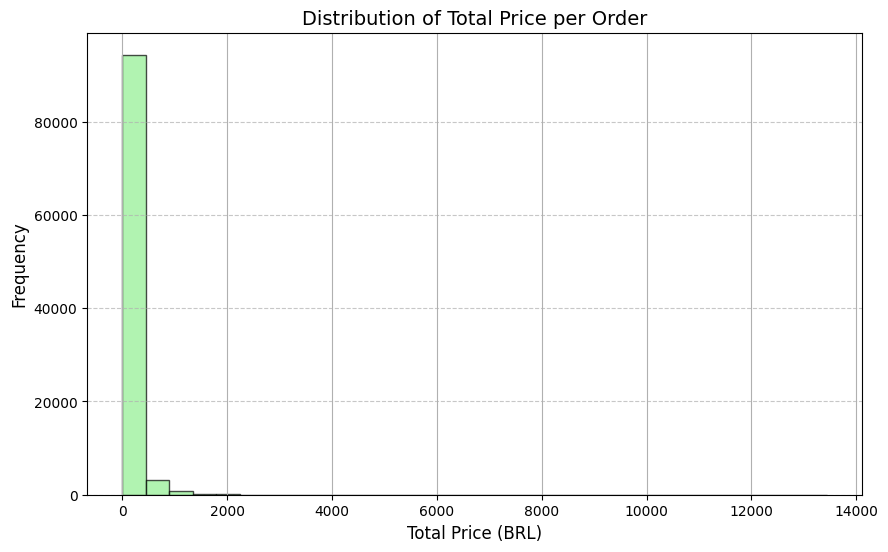

In [83]:
# Visualize distribution of total price per order
plt.figure(figsize=(10, 6))
total_price_per_order.hist(bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Distribution of Total Price per Order', fontsize=14)
plt.xlabel('Total Price (BRL)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


2. **Distribusi Total Harga per Pesanan:**
  - Sebagian besar pesanan memiliki total harga di bawah **500 BRL**.
  - Ada beberapa pesanan dengan total harga sangat tinggi (di atas **5,000 BRL**) yang merupakan outliers.

### Eksplorasi Data `orders_items_df` dan `products_df`

In [84]:
# Merge order_items_df with products_df on 'product_id'
order_items_products_merged = pd.merge(order_items_df, products_df, on='product_id', how='inner')

# Analyze relationship between product weight and freight value
weight_freight_corr = order_items_products_merged[['product_weight_g', 'freight_value']].corr()

# Analyze average price per product category
avg_price_per_category = order_items_products_merged.groupby('product_category_name')['price'].mean().sort_values(ascending=False)

# Display results
weight_freight_corr, avg_price_per_category.head(10)

(                  product_weight_g  freight_value
 product_weight_g          1.000000       0.611359
 freight_value             0.611359       1.000000,
 product_category_name
 pcs                                              1098.340542
 portateis_casa_forno_e_cafe                       624.285658
 eletrodomesticos_2                                476.124958
 agro_industria_e_comercio                         342.124858
 instrumentos_musicais                             281.616000
 eletroportateis                                   280.778468
 portateis_cozinha_e_preparadores_de_alimentos     264.568667
 telefonia_fixa                                    225.693182
 construcao_ferramentas_seguranca                  208.992371
 relogios_presentes                                201.135984
 Name: price, dtype: float64)

**Hasil Analisis dari Penggabungan `order_items_df` dan `products_df`**

1. **Hubungan Berat Produk dan Biaya Pengiriman:**
  - Korelasi: 0.61 antara product_weight_g dan freight_value, menunjukkan hubungan positif yang cukup kuat.
  - Produk dengan berat lebih tinggi cenderung memiliki biaya pengiriman lebih besar, tetapi hubungan ini tidak sepenuhnya linear.
2. **Harga Rata-Rata per Kategori Produk:**
  - Kategori dengan Harga Rata-Rata Tertinggi:
    - `pcs` (kategori tidak umum) memiliki harga rata-rata tertinggi (**1,098.34 BRL**).
    - Kategori seperti `portateis_casa_forno_e_cafe` dan `eletrodomesticos_2` juga menunjukkan harga tinggi, yang mungkin terkait dengan barang elektronik dan alat berat.
  - Kategori lain seperti `agro_industria_e_comercio` (agribisnis) dan `instrumentos_musicais` (alat musik) juga memiliki harga rata-rata tinggi.

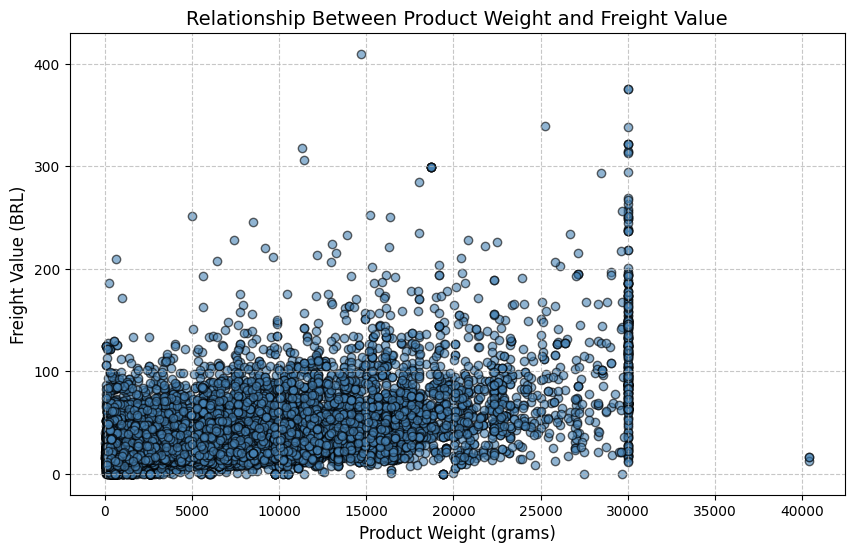

In [85]:
# Visualize relationship between product weight and freight value
plt.figure(figsize=(10, 6))
plt.scatter(
    order_items_products_merged['product_weight_g'],
    order_items_products_merged['freight_value'],
    alpha=0.6, color='steelblue', edgecolor='black'
)
plt.title('Relationship Between Product Weight and Freight Value', fontsize=14)
plt.xlabel('Product Weight (grams)', fontsize=12)
plt.ylabel('Freight Value (BRL)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


1. **Hubungan Berat Produk dan Biaya Pengiriman:**
  - Scatter plot menunjukkan bahwa produk dengan berat lebih tinggi cenderung memiliki biaya pengiriman lebih besar.
  - Sebagian besar produk memiliki berat di bawah **5,000 gram** dengan biaya pengiriman di bawah **50 BRL**, tetapi ada outliers pada kedua atribut.

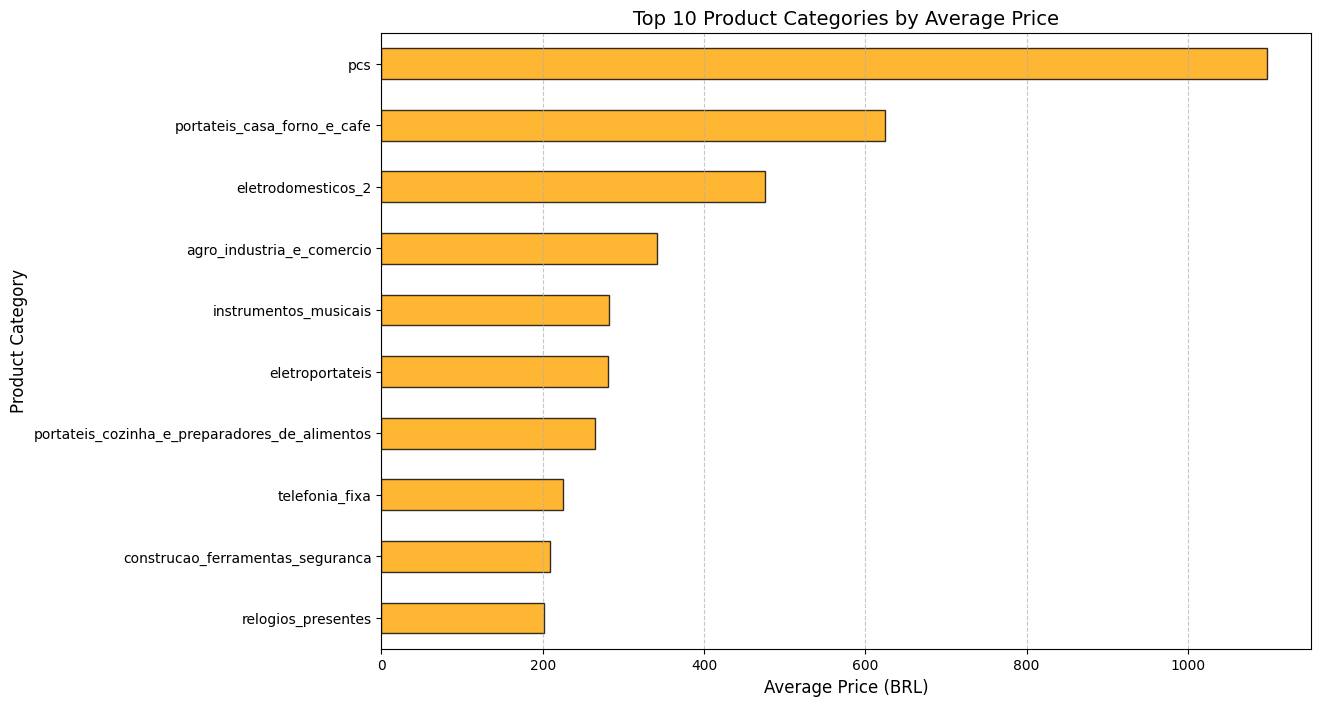

In [86]:
# Visualize average price per category (top 10 categories)
avg_price_per_category.head(10).plot(
    kind='barh', figsize=(12, 8), color='orange', edgecolor='black', alpha=0.8
)
plt.title('Top 10 Product Categories by Average Price', fontsize=14)
plt.xlabel('Average Price (BRL)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

2. **Harga Rata-Rata per Kategori:**
  - Kategori dengan Harga Rata-Rata Tertinggi:
    - `pcs`, `portateis_casa_forno_e_cafe`, dan `eletrodomesticos_2` memiliki harga rata-rata yang jauh lebih tinggi dibandingkan kategori lain.
    - Kategori ini kemungkinan mencakup produk elektronik, alat berat, atau barang premium.

### Eksplorasi Data `orders_df` dan `order_payments_df`

Hal-hal yang akan dieksplorasi bertujuan untuk:
1. **Analisis hubungan antara:**
  - **Status pesanan** (`order_status`) dan **metode pembayaran** (`payment_type`).
  - **Nilai transaksi** (`payment_value`) berdasarkan status pesanan.
2. Melihat distribusi nilai transaksi per metode pembayaran.

In [87]:
# Merge datasets
orders_payments_merged = pd.merge(order_payments_df, orders_df, on='order_id', how='inner')

# Analyze relationship between order_status and payment_type
status_payment_distribution = orders_payments_merged.groupby(['order_status', 'payment_type']).size().unstack()

# Analyze average payment value by payment_type
avg_payment_per_type = orders_payments_merged.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)

# Display results
status_payment_distribution, avg_payment_per_type

(payment_type   boleto  credit_card  debit_card  voucher
 order_status                                           
 approved          NaN          2.0         NaN      NaN
 canceled         95.0        444.0         7.0    115.0
 created           2.0          3.0         NaN      NaN
 delivered     19191.0      74586.0      1486.0   5493.0
 invoiced         67.0        239.0         6.0     13.0
 processing       70.0        224.0         2.0     23.0
 shipped         209.0        851.0        22.0     84.0
 unavailable     150.0        446.0         6.0     47.0,
 payment_type
 credit_card    163.319021
 boleto         145.034435
 debit_card     142.570170
 voucher         65.703354
 Name: payment_value, dtype: float64)

1. **Distribusi Metode Pembayaran Berdasarkan Status Pesanan:**
  - **Pesanan dengan Status *delivered***:
  - Mayoritas menggunakan `credit_card` (74,586 pesanan), diikuti oleh `boleto` (19,191 pesanan).
  - `voucher` juga digunakan cukup sering (5,493 pesanan).
  - **Pesanan yang Dibatalkan (*canceled*):**
    - Metode pembayaran dominan adalah `credit_card` (444 pesanan), diikuti oleh `voucher` (115 pesanan) dan `boleto` (95 pesanan).

2. **Rata-Rata Nilai Transaksi Berdasarkan Metode Pembayaran:**
  - **Metode dengan Rata-Rata Nilai Tertinggi:**
    - `credit_card` memiliki rata-rata transaksi tertinggi (163.32 BRL).
  - `boleto` dan `debit_card` memiliki nilai rata-rata yang hampir setara (145.03 BRL dan 142.57 BRL).
  - `voucher` memiliki nilai rata-rata yang jauh lebih rendah (65.70 BRL).

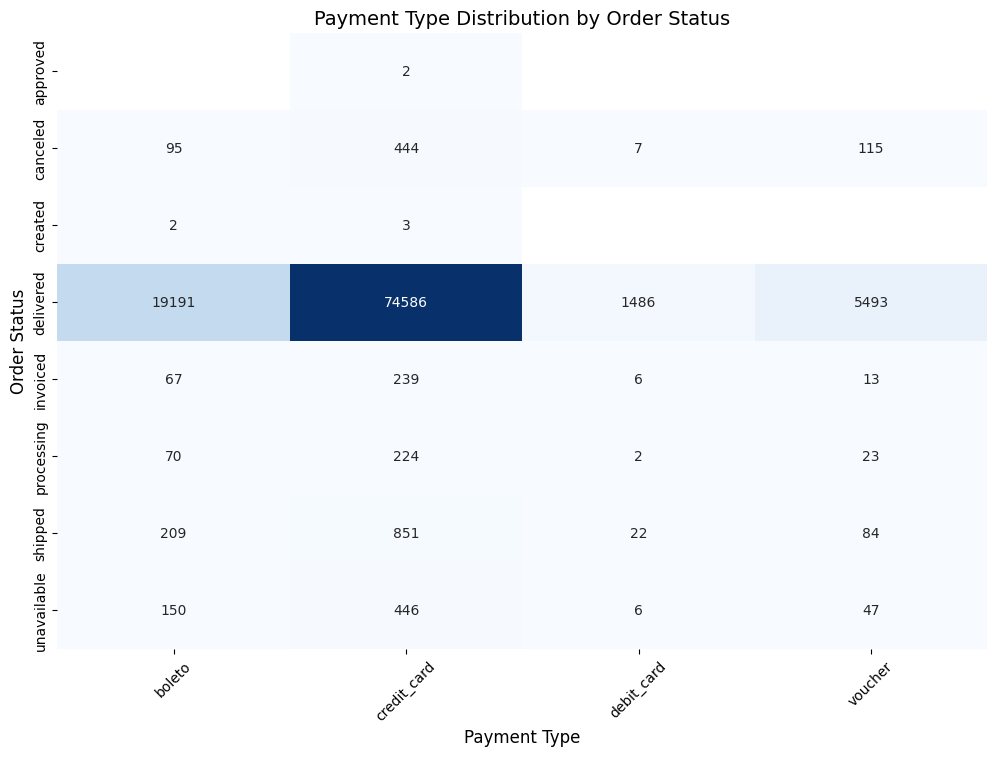

In [88]:
import seaborn as sns

# Visualize distribution of payment_type by order_status
plt.figure(figsize=(12, 8))
sns.heatmap(status_payment_distribution, annot=True, fmt='.0f', cmap='Blues', cbar=False)
plt.title('Payment Type Distribution by Order Status', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Order Status', fontsize=12)
plt.xticks(rotation=45)
plt.show()


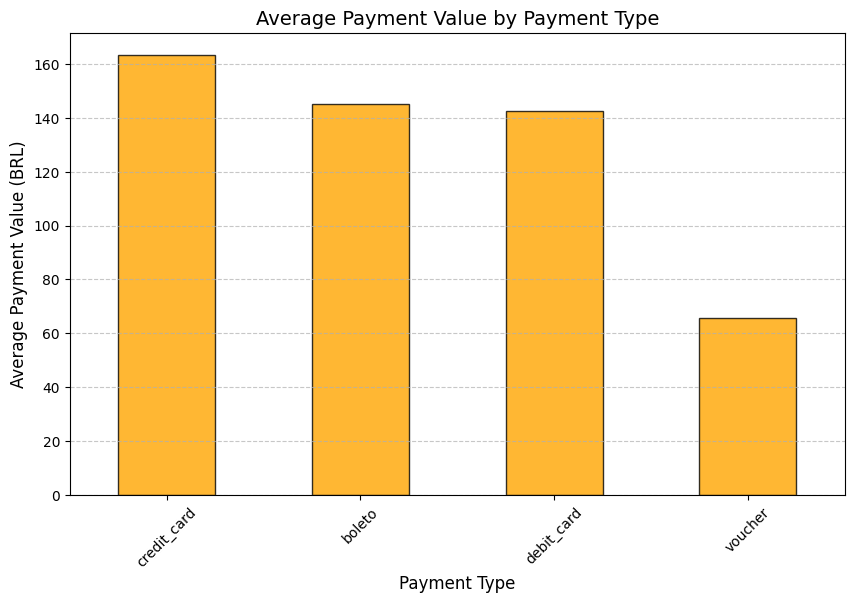

In [89]:
# Visualize average payment value by payment_type
avg_payment_per_type.plot(
    kind='bar', figsize=(10, 6), color='orange', edgecolor='black', alpha=0.8
)
plt.title('Average Payment Value by Payment Type', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Average Payment Value (BRL)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

#### Hasil Visualisasi

1. **Distribusi Metode Pembayaran Berdasarkan Status Pesanan:**
  - Heatmap menunjukkan bahwa `credit_card` adalah metode pembayaran dominan di hampir semua status pesanan, terutama untuk pesanan dengan status *delivered*.
  - `boleto` menjadi metode alternatif yang signifikan, sedangkan `voucher` lebih banyak digunakan pada pesanan dengan status *delivered* dan beberapa pada pesanan *canceled*.

2. **Rata-Rata Nilai Transaksi Berdasarkan Metode Pembayaran:**
  - `credit_card` memiliki rata-rata nilai transaksi tertinggi, diikuti oleh boleto dan debit_card.
  - `voucher` memiliki nilai rata-rata yang jauh lebih rendah, menunjukkan penggunaan untuk transaksi kecil.

### Eksplorasi Data `products_df` dan `product_category_name_translation_df`

In [90]:
# Merge products_df with product_category_name_translation_df on 'product_category_name'
products_translated = pd.merge(
    products_df,
    product_category_name_translation_df,
    on='product_category_name',
    how='left'
)

# Display a preview of the merged dataset and number of missing translations
products_translated_preview = products_translated.head()

# Check if translation is complete
missing_translations = products_translated['product_category_name_english'].isnull().sum()

products_translated_preview, missing_translations

(                         product_id  product_category_name  \
 0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
 1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
 2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
 3  cef67bcfe19066a932b7673e239eb23d                  bebes   
 4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   
 
    product_name_length  product_description_length  product_photos_qty  \
 0                 40.0                       287.0                 1.0   
 1                 44.0                       276.0                 1.0   
 2                 46.0                       250.0                 1.0   
 3                 27.0                       261.0                 1.0   
 4                 37.0                       402.0                 4.0   
 
    product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
 0             225.0               16.0               10.0              14.0   
 1      

1. **Integrasi Nama Kategori Produk:**
  - Nama kategori produk berhasil ditambahkan dalam bahasa Inggris di kolom `product_category_name_english`.

2. **Missing Translations:**
  - Terdapat 13 kategori yang tidak memiliki translasi. Kemungkinan kategori ini:
    - Tidak tersedia dalam dataset translasi.
    - Merupakan kategori yang jarang digunakan.


In [91]:
# Handle missing translations by filling with 'unknown'
products_translated['product_category_name_english'] = products_translated['product_category_name_english'].fillna('unknown')


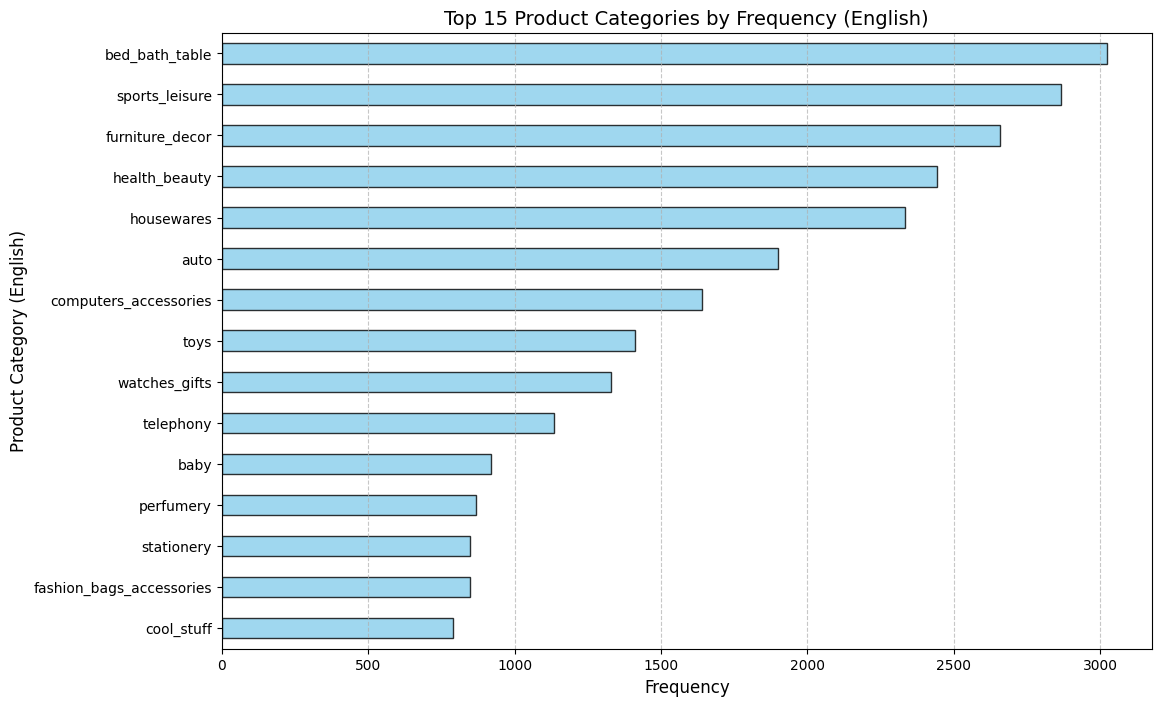

In [92]:
# Visualize distribution of product categories in English
plt.figure(figsize=(12, 8))
products_translated['product_category_name_english'].value_counts().head(15).plot(
    kind='barh', color='skyblue', edgecolor='black', alpha=0.8
)
plt.title('Top 15 Product Categories by Frequency (English)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Product Category (English)', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**Hasil Penanganan dan Visualisasi Kategori Produk dalam Bahasa Inggris**

1. **Penanganan Missing Translations:**
  - Semua kategori tanpa translasi telah diisi dengan unknown untuk memastikan dataset tetap lengkap.

2. **Visualisasi Distribusi Kategori:**
  - Kategori Populer:
    - `bed_bath_table`, `health_beauty`, dan `sports_leisure` adalah kategori yang paling sering muncul.
  - Konsentrasi Data:
    - Sebagian besar frekuensi terkonsentrasi pada beberapa kategori utama, menunjukkan fokus penjualan pada produk rumah tangga, kecantikan, dan olahraga.


### Eksplorasi Data `orders_df`, `order_items_df`, dan `products_df`

In [93]:
# Merge orders_df, order_items_df, and products_df
orders_items_products = pd.merge(order_items_df, orders_df, on='order_id', how='inner')
orders_items_products = pd.merge(orders_items_products, products_df, on='product_id', how='inner')

# Analyze total price per category with late deliveries
late_deliveries_by_category = orders_items_products[orders_items_products['order_delivered_customer_date'] >
                                                    orders_items_products['order_estimated_delivery_date']] \
                              .groupby('product_category_name')['price'].sum().sort_values(ascending=False)

# Analyze total price per category (all deliveries)
total_price_by_category = orders_items_products.groupby('product_category_name')['price'].sum().sort_values(ascending=False)

# Preview results
late_deliveries_by_category.head(10), total_price_by_category.head(10)

(product_category_name
 beleza_saude              112506.27
 relogios_presentes        104208.59
 cama_mesa_banho            92757.47
 esporte_lazer              85365.79
 informatica_acessorios     73859.49
 automotivo                 71335.51
 moveis_decoracao           68801.03
 cool_stuff                 50256.70
 utilidades_domesticas      46932.07
 bebes                      41822.75
 Name: price, dtype: float64,
 product_category_name
 beleza_saude              1258681.34
 relogios_presentes        1205005.68
 cama_mesa_banho           1036039.18
 esporte_lazer              988048.97
 informatica_acessorios     911954.32
 moveis_decoracao           729762.49
 cool_stuff                 635290.85
 utilidades_domesticas      632248.66
 automotivo                 592720.11
 ferramentas_jardim         485256.46
 Name: price, dtype: float64)

**Hasil Integrasi orders_df, order_items_df, dan products_df**

1. **Kategori dengan Nilai Total Tertinggi untuk Pesanan Terlambat:**
  - `beleza_saude` (beauty and health) memimpin dengan total nilai transaksi **112,506 BRL**.
  - Kategori populer lainnya:
    - `relogios_presentes` (watches and gifts): **104,208 BRL**.
    - `cama_mesa_banho` (bed, bath, and table): **92,757 BRL**.

2. **Kategori dengan Nilai Total Tertinggi untuk Semua Pesanan:**
  - `beleza_saude` kembali memimpin dengan total nilai transaksi **1,258,681 BRL**.
  - Kategori populer lainnya:
    - `relogios_presentes`: **1,205,005 BRL**.
    - `cama_mesa_banho`: **1,036,988 BRL**.


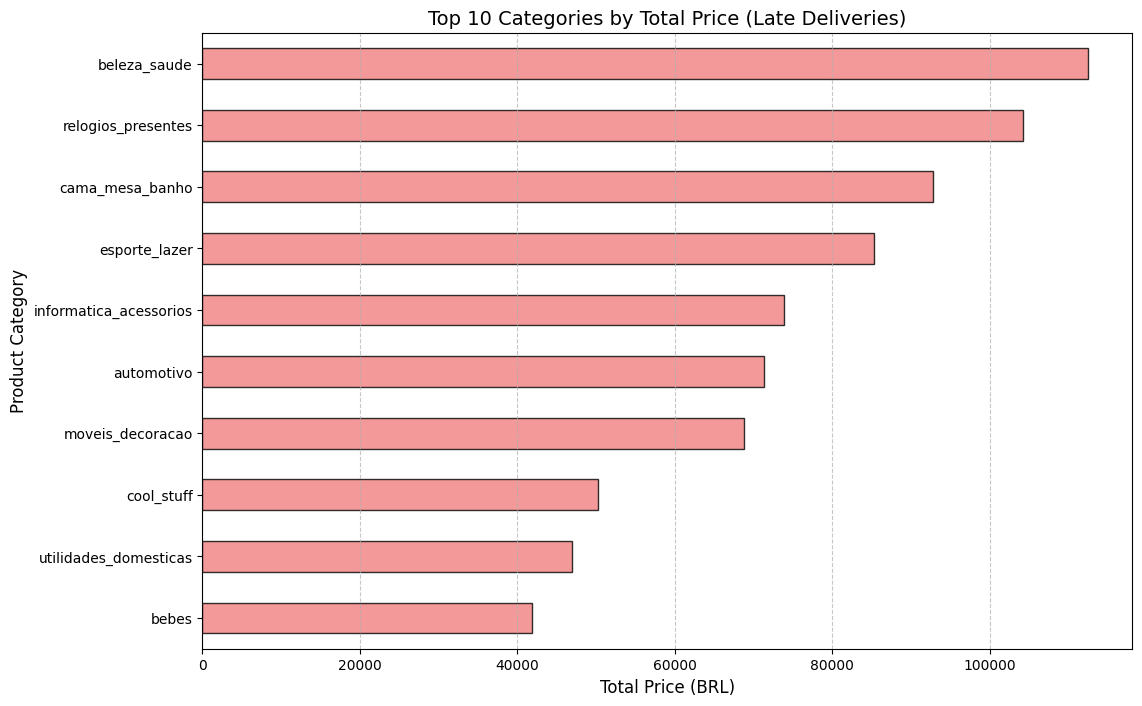

In [94]:
# Visualize late deliveries by category
plt.figure(figsize=(12, 8))
late_deliveries_by_category.head(10).plot(
    kind='barh', color='lightcoral', edgecolor='black', alpha=0.8
)
plt.title('Top 10 Categories by Total Price (Late Deliveries)', fontsize=14)
plt.xlabel('Total Price (BRL)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

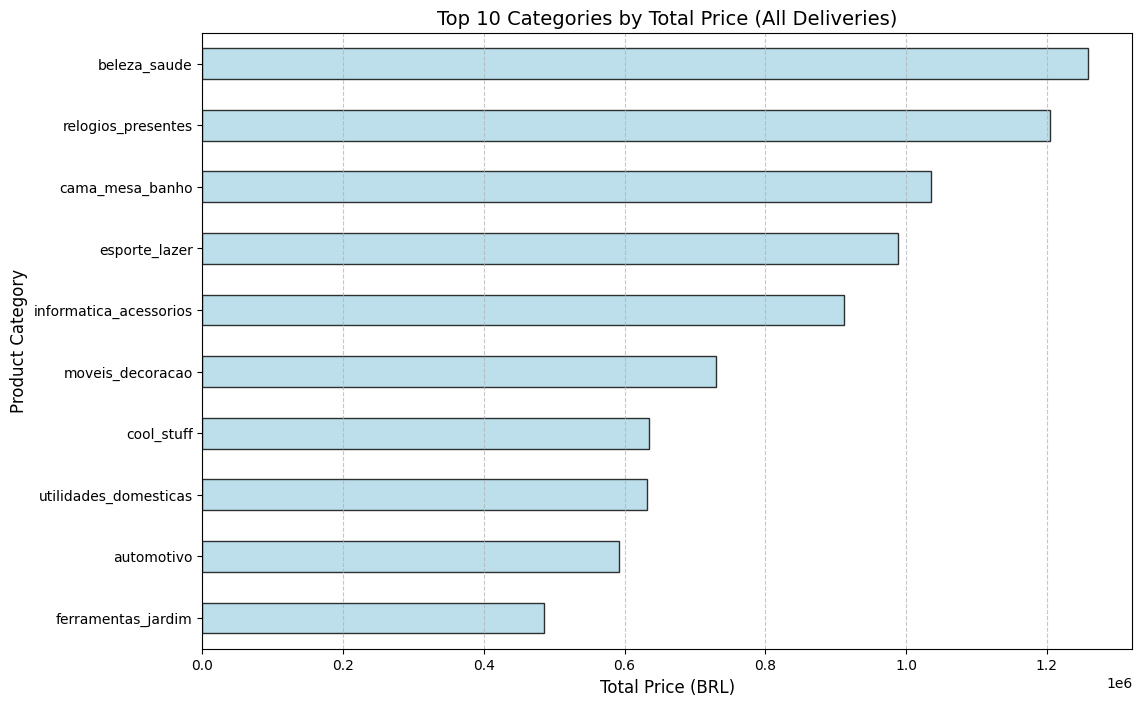

In [95]:
# Visualize total price by category (all deliveries)
plt.figure(figsize=(12, 8))
total_price_by_category.head(10).plot(
    kind='barh', color='lightblue', edgecolor='black', alpha=0.8
)
plt.title('Top 10 Categories by Total Price (All Deliveries)', fontsize=14)
plt.xlabel('Total Price (BRL)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Visualisasi Kategori dengan Nilai Transaksi Tertinggi**

1. **Pesanan Terlambat:**
  - `beleza_saude` (beauty and health) mendominasi pesanan dengan nilai total transaksi tertinggi meskipun terlambat.
  - Kategori seperti `relogios_presentes` (watches and gifts) dan cama_mesa_banho (bed, bath, and table) juga menunjukkan kontribusi besar pada nilai pesanan terlambat.

2. **Semua Pesanan:**
  - Pola serupa terlihat untuk semua pesanan, dengan `beleza_saude`, `relogios_presentes`, dan `cama_mesa_banho` tetap memimpin.
  - Kategori seperti `informatica_acessorios` (computer accessories) juga menunjukkan nilai transaksi signifikan.

### Eksplorasi Data `orders_df`, `order_items_df`, `products_df`, dan `order_payments_df`

In [96]:
# Merge orders_items_products with order_payments_df on 'order_id'
orders_items_products_payments = pd.merge(
    orders_items_products,
    order_payments_df,
    on='order_id',
    how='inner'
)

# Analyze total payment value by product category and payment type
payment_value_by_category_payment_type = orders_items_products_payments.groupby(
    ['product_category_name', 'payment_type']
)['payment_value'].sum().unstack()

# Analyze average payment value by payment type
avg_payment_by_payment_type = orders_items_products_payments.groupby('payment_type')['payment_value'].mean()

# Display results
payment_value_by_category_payment_type.head(10), avg_payment_by_payment_type

(payment_type                  boleto  credit_card  debit_card   voucher
 product_category_name                                                  
 agro_industria_e_comercio   54411.43     61173.89     1625.04   1520.25
 alimentos                    7481.18     36370.75     1936.86    639.88
 alimentos_bebidas            6437.69     20183.72      249.42    418.90
 artes                       12104.96     17460.66      665.97    761.34
 artes_e_artesanato            770.40      1365.82      189.95       NaN
 artigos_de_festas            2220.52      3484.42      171.37     90.00
 artigos_de_natal             3473.74     15431.37       54.16     35.50
 audio                        9884.74     47339.17     1023.85   2076.86
 automotivo                 131257.12    695976.30     8647.51  16413.40
 bebes                       97552.27    422306.43     5246.76  12779.20,
 payment_type
 boleto         177.478930
 credit_card    180.072784
 debit_card     150.486787
 voucher         64.737531
 

**Hasil Analisis dengan Integrasi orders_items_products + order_payments_df**

1. **Nilai Total Transaksi per Kategori Produk dan Metode Pembayaran:**
  - `automotivo` (automotive):
    - `credit_card`: Nilai transaksi tertinggi (695,976 BRL).
    - `boleto` (bank slip): Nilai transaksi signifikan (131,257 BRL).
  - `bebes` (baby products):
    - `credit_card` juga dominan (424,267 BRL).
    - Metode `voucher` juga menunjukkan kontribusi signifikan (12,779 BRL).

2. **Rata-Rata Nilai Transaksi Berdasarkan Metode Pembayaran:**
  - `credit_card` memiliki rata-rata nilai transaksi tertinggi (179.66 BRL), diikuti oleh:
    - `boleto` (177.53 BRL).
    - `debit_card` (149.93 BRL).
  - `voucher` memiliki rata-rata nilai transaksi terendah (64.69 BRL), menunjukkan penggunaan untuk pembelian kecil.

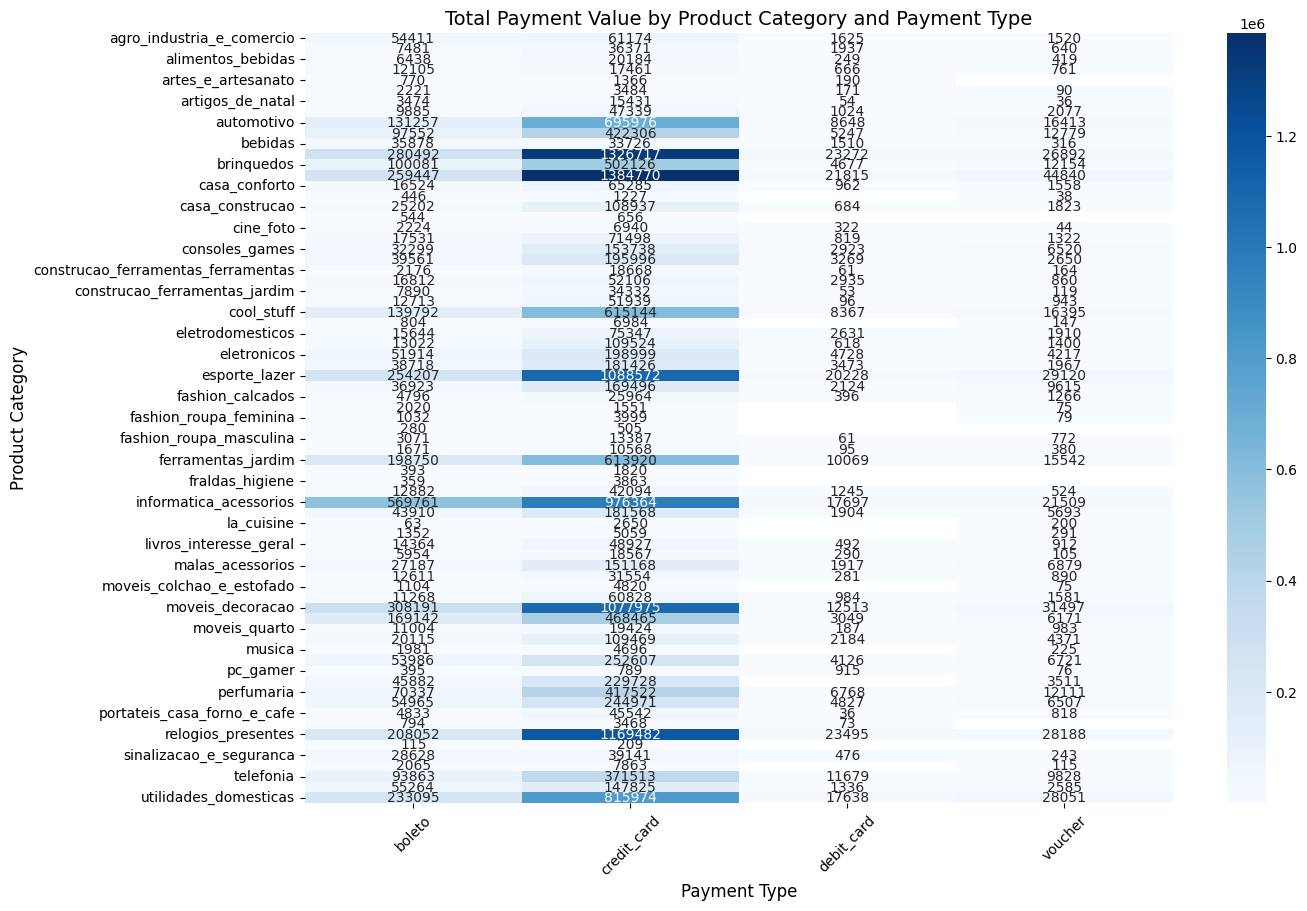

In [97]:
# Visualize total payment value by category and payment type
plt.figure(figsize=(14, 10))
sns.heatmap(payment_value_by_category_payment_type, annot=True, fmt='.0f', cmap='Blues', cbar=True)
plt.title('Total Payment Value by Product Category and Payment Type', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.xticks(rotation=45)
plt.show()

1. **Nilai Total Transaksi per Kategori Produk dan Metode Pembayaran:**
  - Heatmap menunjukkan bahwa:
    - `credit_card` mendominasi nilai transaksi di hampir semua kategori produk, khususnya `automotivo` dan `bebes`.
    - `boleto` memberikan kontribusi besar di beberapa kategori seperti `automotivo` dan `agro_industria_e_comercio`.
    - `voucher` lebih sering digunakan untuk kategori dengan nilai transaksi lebih kecil.

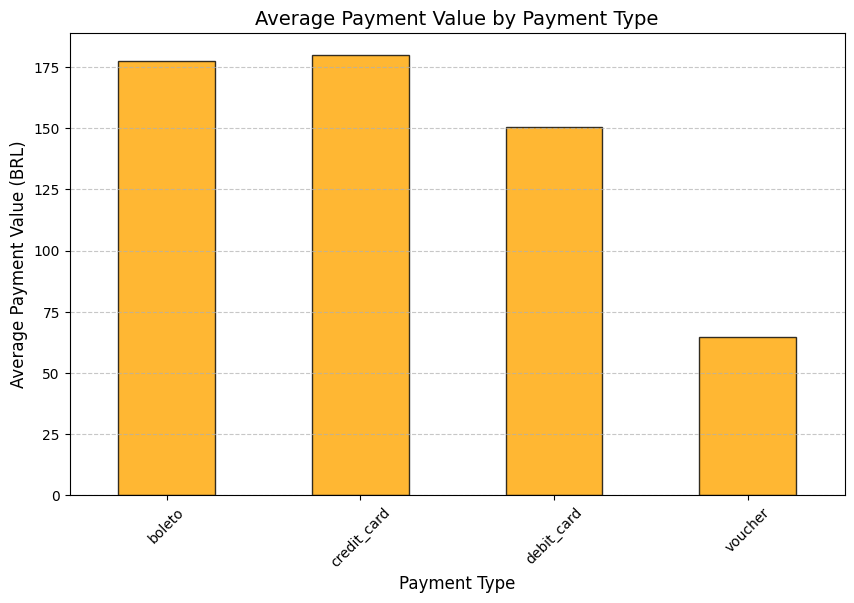

In [98]:
# Visualize average payment value by payment type
avg_payment_by_payment_type.plot(
    kind='bar', figsize=(10, 6), color='orange', edgecolor='black', alpha=0.8
)
plt.title('Average Payment Value by Payment Type', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Average Payment Value (BRL)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

2. **Rata-Rata Nilai Transaksi per Metode Pembayaran:**
  - `credit_card` dan `boleto` memiliki rata-rata nilai transaksi yang sangat mirip, mendominasi di pembelian besar.
  - `voucher` memiliki rata-rata nilai transaksi yang rendah, menunjukkan penggunaannya lebih untuk transaksi kecil.

### Eksplorasi Data all_df

In [99]:
# Merge all datasets together
# Step 1: Merge orders_df, order_items_df, and products_df
full_merged = pd.merge(order_items_df, orders_df, on='order_id', how='inner')
full_merged = pd.merge(full_merged, products_df, on='product_id', how='inner')

# Step 2: Add order_payments_df
full_merged = pd.merge(full_merged, order_payments_df, on='order_id', how='inner')

# Step 3: Integrate product_category_name_translation_df
#product_category_name_translation_df = pd.read_csv('/mnt/data/product_category_name_translation.csv')
#products_df['product_category_name'] = products_df['product_category_name'].fillna('unknown')
full_merged = pd.merge(
    full_merged,
    product_category_name_translation_df,
    on='product_category_name',
    how='left'
)

# Analyze a few key metrics
# Total payment value by category and order status
payment_by_category_status = full_merged.groupby(
    ['product_category_name_english', 'order_status']
)['payment_value'].sum().unstack()

# Total freight value by payment type
freight_by_payment_type = full_merged.groupby('payment_type')['freight_value'].sum()

# Display results
payment_by_category_status.head(10), freight_by_payment_type


(order_status                   approved  canceled   delivered  invoiced  \
 product_category_name_english                                             
 agro_industry_and_commerce          NaN       NaN   115632.24     28.22   
 air_conditioning                    NaN    337.62    88849.72    118.24   
 art                                 NaN     51.60    28498.45       NaN   
 arts_and_craftmanship               NaN       NaN     2326.17       NaN   
 audio                               NaN     27.68    60181.00       NaN   
 auto                                NaN   8950.72   833745.67    908.83   
 baby                                NaN   1953.41   523592.22   2913.96   
 bed_bath_table                      NaN   1295.59  1691032.94   1838.26   
 books_general_interest              NaN   1400.60    62818.01    144.54   
 books_imported                      NaN       NaN     6443.13    143.86   
 
 order_status                   processing   shipped  unavailable  
 product_category_

1. **Nilai Total Transaksi berdasarkan Kategori Produk dan Status Pesanan:**
  - Kategori Populer pada Pesanan delivered:
    - bed_bath_table memiliki nilai transaksi tertinggi (1,692,714 BRL).
    - baby (525,553 BRL) dan auto (833,745 BRL) juga berkontribusi besar.
  - Kategori pada Pesanan canceled:
    - auto memiliki nilai tertinggi (8,951 BRL) untuk pesanan yang dibatalkan.
  - Kategori lain seperti books_general_interest juga muncul, tetapi dengan kontribusi lebih kecil.

2. **Total Biaya Pengiriman berdasarkan Metode Pembayaran:**
  - `credit_card`:
    - Mendominasi biaya pengiriman dengan total 1,749,557 BRL, mencerminkan penggunaannya pada transaksi besar.
  - `boleto`:
    - Kontribusi besar juga terlihat, dengan total biaya pengiriman mencapai 450,714 BRL.
  - `voucher`:
    - Biaya pengiriman lebih kecil, mencerminkan penggunaannya untuk transaksi ringan.

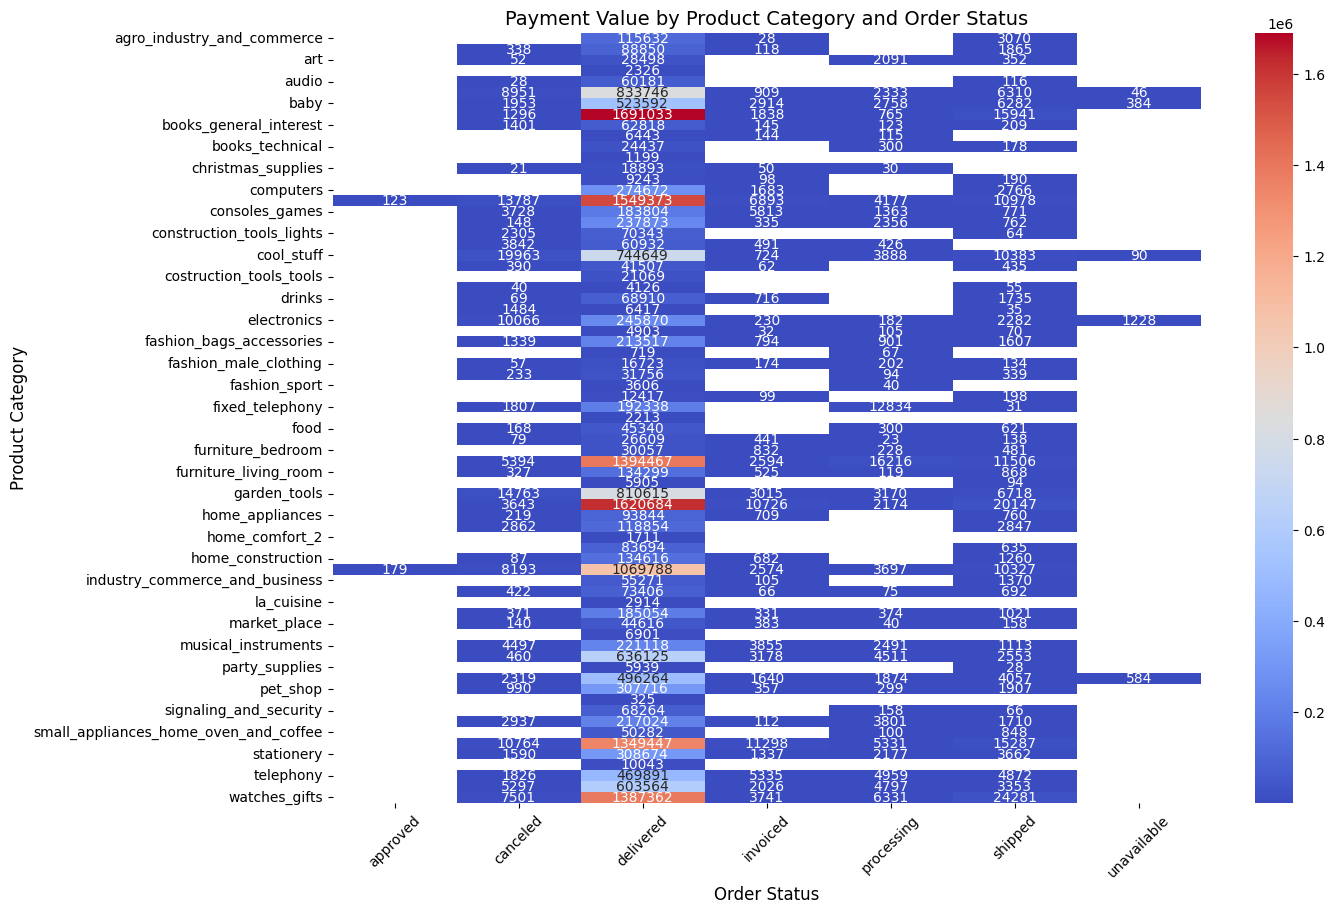

In [100]:
# Visualize payment value by product category and order status
plt.figure(figsize=(14, 10))
sns.heatmap(payment_by_category_status, annot=True, fmt='.0f', cmap='coolwarm', cbar=True)
plt.title('Payment Value by Product Category and Order Status', fontsize=14)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.xticks(rotation=45)
plt.show()

1. **Nilai Total Transaksi berdasarkan Kategori Produk dan Status Pesanan:**
  - Heatmap menunjukkan pola berikut:
    - bed_bath_table mendominasi transaksi pada pesanan delivered, mencerminkan tingginya permintaan produk rumah tangga.
    - Kategori seperti baby dan auto juga signifikan untuk pesanan yang berhasil.
    - Nilai transaksi pada kategori dengan status canceled cenderung rendah, kecuali untuk kategori seperti auto.

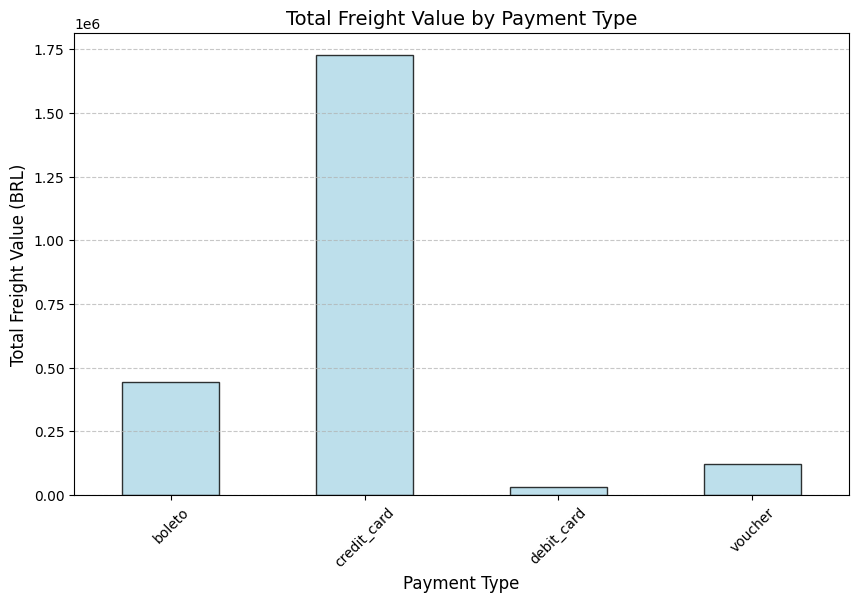

In [101]:
# Visualize freight value by payment type
freight_by_payment_type.plot(
    kind='bar', figsize=(10, 6), color='lightblue', edgecolor='black', alpha=0.8
)
plt.title('Total Freight Value by Payment Type', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Total Freight Value (BRL)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

2. **Biaya Pengiriman Berdasarkan Metode Pembayaran:**
  - Bar chart menunjukkan:
    - `credit_card` memiliki total biaya pengiriman tertinggi, mencerminkan dominasi pada transaksi besar.
    - `boleto` adalah metode alternatif dengan kontribusi biaya pengiriman yang signifikan.
    - `voucher` lebih sering digunakan untuk pesanan dengan biaya pengiriman kecil.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori Produk Mana yang Paling Sering Dibeli oleh Pelanggan?

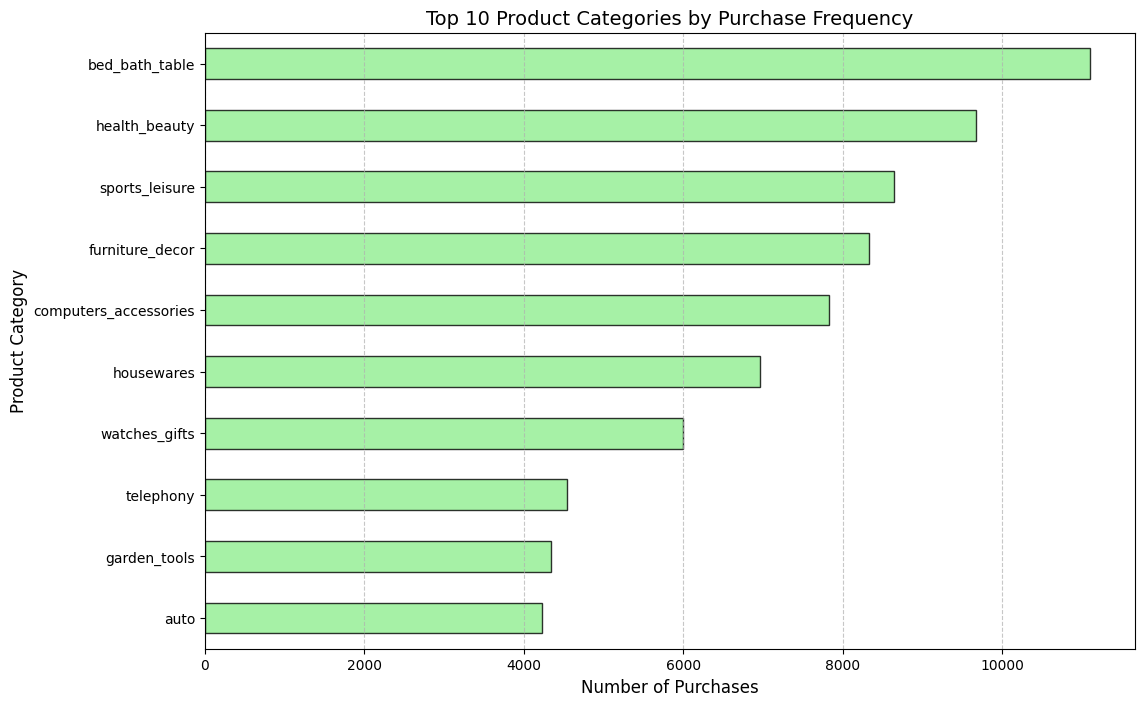

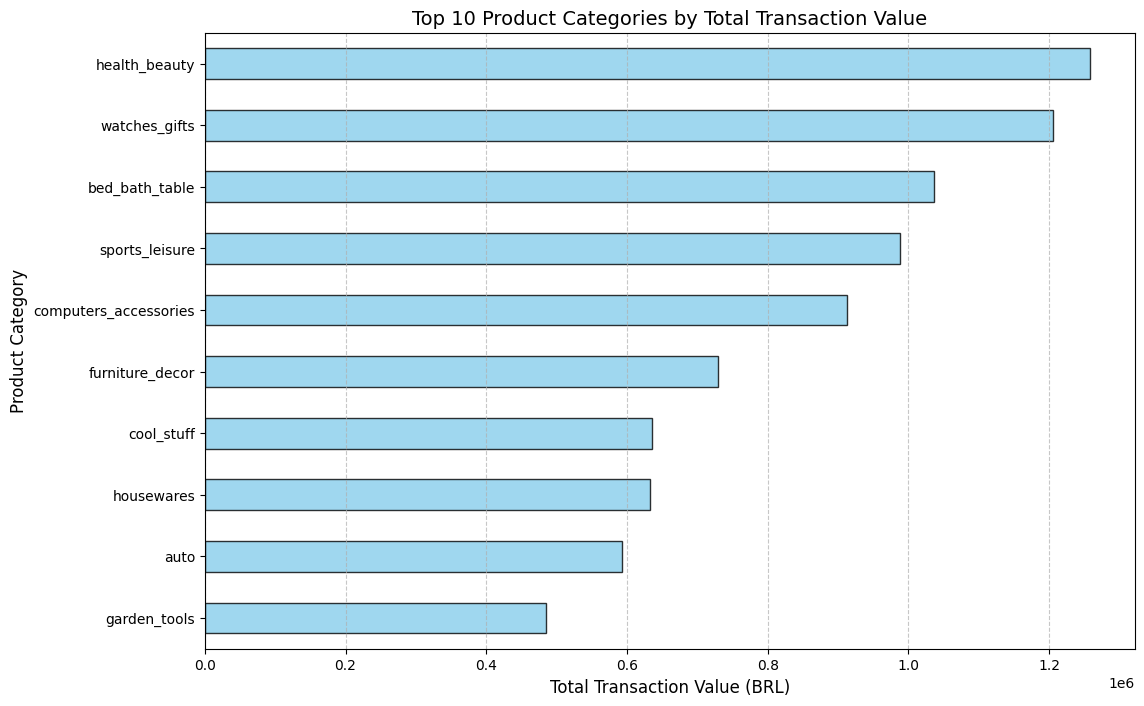

In [102]:
# Merge order_items_df, orders_df, and products_df
order_items_products = pd.merge(order_items_df, orders_df, on='order_id', how='inner')
order_items_products = pd.merge(order_items_products, products_df, on='product_id', how='inner')

# Merge product category name translations
order_items_products = pd.merge(
    order_items_products,
    product_category_name_translation_df,
    on='product_category_name',
    how='left'
)

# Analyze and visualize most frequently purchased product categories
category_purchase_count = order_items_products.groupby('product_category_name_english').size().sort_values(ascending=False)

# Visualize top 10 product categories by purchase frequency
plt.figure(figsize=(12, 8))
category_purchase_count.head(10).plot(
    kind='barh', color='lightgreen', edgecolor='black', alpha=0.8
)
plt.title('Top 10 Product Categories by Purchase Frequency', fontsize=14)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Aggregate the total price by product category
category_total_value = order_items_products.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False)

# Visualize top 10 product categories by total transaction value
plt.figure(figsize=(12, 8))
category_total_value.head(10).plot(
    kind='barh', color='skyblue', edgecolor='black', alpha=0.8
)
plt.title('Top 10 Product Categories by Total Transaction Value', fontsize=14)
plt.xlabel('Total Transaction Value (BRL)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

1. **Berdasarkan Frekuensi Pembelian:**
  - `bed_bath_table`, `health_beauty`, dan `sports_leisure` adalah kategori yang paling sering dibeli oleh pelanggan.
  - Hal ini menunjukkan fokus pelanggan pada kebutuhan rumah tangga, kecantikan, dan olahraga.

2. **Berdasarkan Nilai Total Transaksi:**
  - `bed_bath_table` juga mendominasi dalam nilai total transaksi, diikuti oleh `health_beauty` dan `computers_accessories`.
  - Kategori dengan nilai transaksi tinggi ini mencerminkan produk dengan harga rata-rata lebih tinggi dalam kategori tersebut.

### Pertanyaan 2: Pada Bulan Apa Penjualan Cenderung Lebih Tinggi?

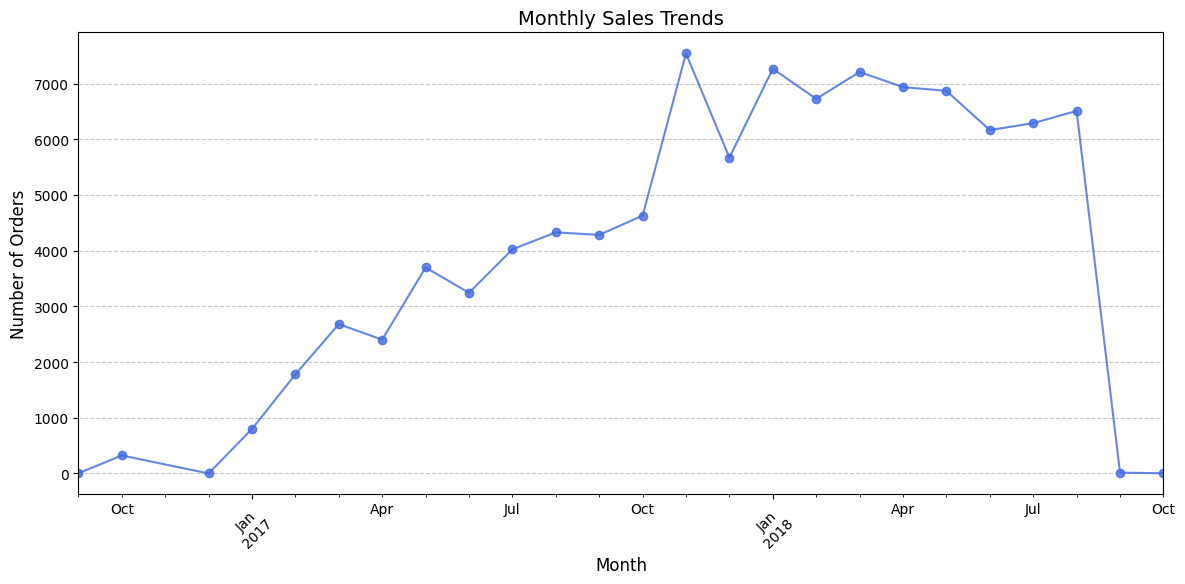

In [103]:
# Reattempt analysis for monthly sales trends
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Aggregate number of orders per month
monthly_sales = orders_df.groupby('order_month').size()

# Visualize monthly sales trends
plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='line', marker='o', color='royalblue', alpha=0.8, linestyle='-')
plt.title('Monthly Sales Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. **Tren Penjualan Bulanan:**
  - Penjualan menunjukkan pola yang meningkat secara bertahap hingga mencapai puncaknya pada pertengahan 2018.
  - Beberapa bulan seperti **November 2017** dan **Januari 2018** menonjol sebagai bulan dengan volume pesanan yang tinggi.

2. **Penurunan di Akhir Waktu:**
  - Penurunan pesanan terlihat pada bulan-bulan terakhir dataset, yang mungkin disebabkan oleh data yang tidak lengkap atau penurunan aktivitas.


### Pertanyaan 3: Apakah Metode Pembayaran Tertentu Cenderung Menghasilkan Nilai Transaksi yang Lebih Tinggi?


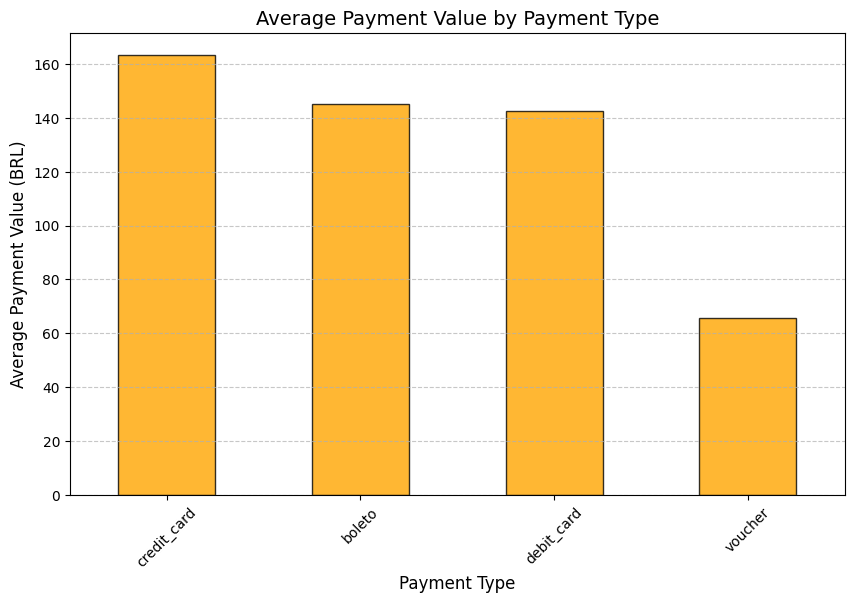

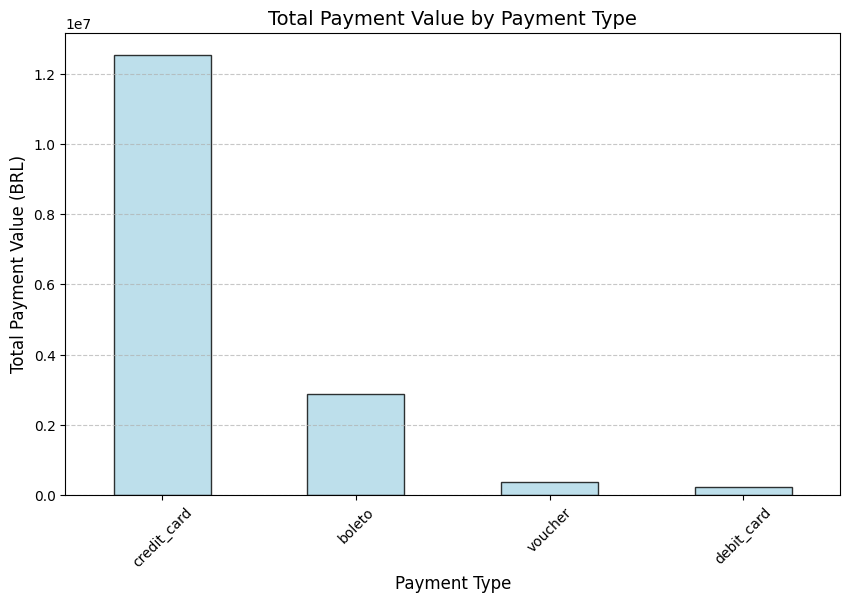

In [104]:
# Aggregate average payment value by payment type
avg_payment_value_by_type = order_payments_df.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)

# Visualize average payment value by payment type
plt.figure(figsize=(10, 6))
avg_payment_value_by_type.plot(kind='bar', color='orange', edgecolor='black', alpha=0.8)
plt.title('Average Payment Value by Payment Type', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Average Payment Value (BRL)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# Aggregate total payment value by payment type
total_payment_value_by_type = order_payments_df.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)

# Visualize total payment value by payment type
plt.figure(figsize=(10, 6))
total_payment_value_by_type.plot(kind='bar', color='lightblue', edgecolor='black', alpha=0.8)
plt.title('Total Payment Value by Payment Type', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Total Payment Value (BRL)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


1. **Rata-Rata Nilai Transaksi Berdasarkan Metode Pembayaran:**
  - `credit_card` memiliki rata-rata nilai transaksi tertinggi.
  - `boleto` (bank slip) hampir setara dengan `credit_card`, menunjukkan relevansi untuk transaksi besar.
  - `voucher` memiliki rata-rata nilai transaksi terendah, lebih sering digunakan untuk pembelian kecil.

2. **Total Nilai Transaksi Berdasarkan Metode Pembayaran:**
  - `credit_card` mendominasi dengan total nilai transaksi tertinggi, mencerminkan penggunaannya yang luas.
  - `boleto` juga berkontribusi besar pada total transaksi, meskipun dengan frekuensi lebih rendah.
  - `voucher` memiliki total transaksi yang lebih kecil, mencerminkan perannya pada pembelian skala kecil.

### Pertanyaan 4:Apakah Berat Produk Mempengaruhi Biaya Pengiriman?

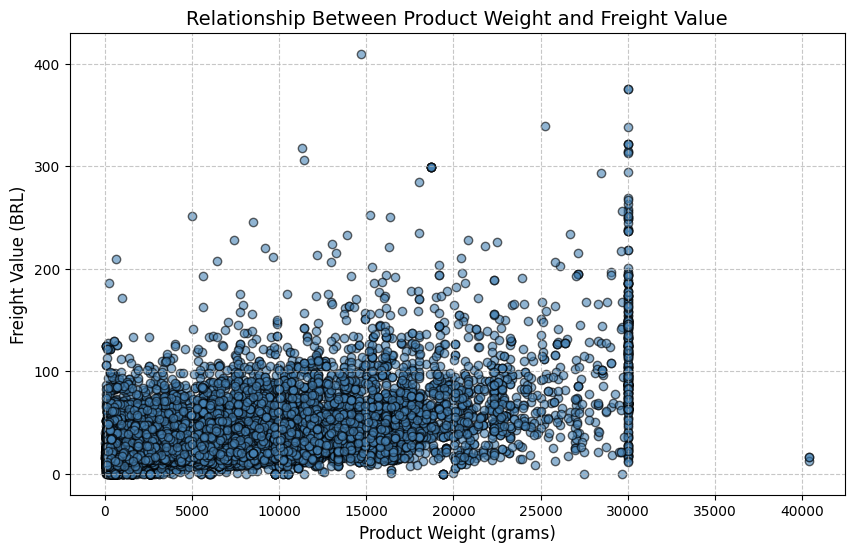

,product_weight_g,freight_value
product_weight_g,1.000000,0.611359
freight_value,0.611359,1.000000


In [105]:
# Analyze relationship between product weight and freight value
plt.figure(figsize=(10, 6))
plt.scatter(
    order_items_products['product_weight_g'],
    order_items_products['freight_value'],
    alpha=0.6, color='steelblue', edgecolor='black'
)
plt.title('Relationship Between Product Weight and Freight Value', fontsize=14)
plt.xlabel('Product Weight (grams)', fontsize=12)
plt.ylabel('Freight Value (BRL)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Correlation between product weight and freight value
correlation_weight_freight = order_items_products[['product_weight_g', 'freight_value']].corr()
correlation_weight_freight


1. **Hubungan Berat Produk dan Biaya Pengiriman:**
  - Scatter plot menunjukkan bahwa produk dengan berat lebih tinggi cenderung memiliki biaya pengiriman lebih besar.
  - Sebagian besar produk memiliki berat di bawah 5,000 gram dan biaya pengiriman di bawah 50 BRL.

2. Korelasi Positif:
  - Korelasi antara berat produk (`product_weight_g`) dan biaya pengiriman (`freight_value`) adalah 0.61, menunjukkan hubungan positif yang cukup kuat.

**Insight:**

1. Kategori Produk Paling Populer:
  - `bed_bath_table` adalah kategori dengan frekuensi dan nilai transaksi tertinggi.
2. Bulan Penjualan Tertinggi:
  - Penjualan mencapai puncaknya pada pertengahan 2018.
3. Metode Pembayaran Tertinggi:
  - `credit_card` menghasilkan nilai transaksi tertinggi baik rata-rata maupun total.
4. Hubungan Berat dan Biaya Pengiriman:
  - Produk yang lebih berat cenderung memiliki biaya pengiriman lebih tinggi.

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [106]:
# Merge orders and order_items for RFM Analysis
rfm_df = pd.merge(order_items_df, orders_df, on='order_id', how='inner')[['order_id', 'customer_id', 'order_purchase_timestamp', 'price']]

# Calculate Recency
current_date = rfm_df['order_purchase_timestamp'].max()
rfm_recency = rfm_df.groupby('customer_id')['order_purchase_timestamp'].apply(lambda x: (current_date - x.max()).days)

# Calculate Frequency
rfm_frequency = rfm_df.groupby('customer_id')['order_id'].nunique()

# Calculate Monetary
rfm_monetary = rfm_df.groupby('customer_id')['price'].sum()

# Combine RFM values
rfm_table = pd.DataFrame({
    'Recency': rfm_recency,
    'Frequency': rfm_frequency,
    'Monetary': rfm_monetary
}).reset_index()

# Categorize RFM Scores (Binning)
rfm_table['Recency_Score'] = pd.qcut(rfm_table['Recency'], 4, labels=[4, 3, 2, 1])
rfm_table['Frequency_Score'] = pd.qcut(rfm_table['Frequency'].rank(method="first"), 4, labels=[1, 2, 3, 4])
rfm_table['Monetary_Score'] = pd.qcut(rfm_table['Monetary'], 4, labels=[1, 2, 3, 4])

# RFM Segments
rfm_table['RFM_Segment'] = rfm_table['Recency_Score'].astype(str) + rfm_table['Frequency_Score'].astype(str) + rfm_table['Monetary_Score'].astype(str)

# Count customers in each RFM Segment
rfm_segment_counts = rfm_table['RFM_Segment'].value_counts()

rfm_table.head(), rfm_segment_counts.head()


(                        customer_id  Recency  Frequency  Monetary  \
 0  00012a2ce6f8dcda20d059ce98491703      292          1     89.80   
 1  000161a058600d5901f007fab4c27140      413          1     54.90   
 2  0001fd6190edaaf884bcaf3d49edf079      551          1    179.99   
 3  0002414f95344307404f0ace7a26f1d5      382          1    149.90   
 4  000379cdec625522490c315e70c7a9fb      153          1     93.00   
 
   Recency_Score Frequency_Score Monetary_Score RFM_Segment  
 0             2               1              3         213  
 1             1               1              2         112  
 2             1               1              4         114  
 3             1               1              3         113  
 4             3               1              3         313  ,
 RFM_Segment
 343    1659
 423    1618
 242    1614
 141    1610
 131    1603
 Name: count, dtype: int64)

Hasil RFM Analysis

1. Contoh Data RFM Table:
  - Customer A:
    - Recency: 292 hari sejak transaksi terakhir.
    - Frequency: 1 transaksi.
    - Monetary: Total nilai transaksi sebesar 89.80 BRL.
    - RFM Segment: 213 (Recency tinggi, Frequency rendah, Monetary sedang).

2. RFM Segments dengan Pelanggan Terbanyak:
  - 343: Segmen ini memiliki 1,659 pelanggan, mencerminkan pelanggan yang baru saja bertransaksi (Recency tinggi), dengan frekuensi dan nilai transaksi sedang.
  - Segmen lain seperti 423 dan 242 juga menunjukkan jumlah pelanggan signifikan.

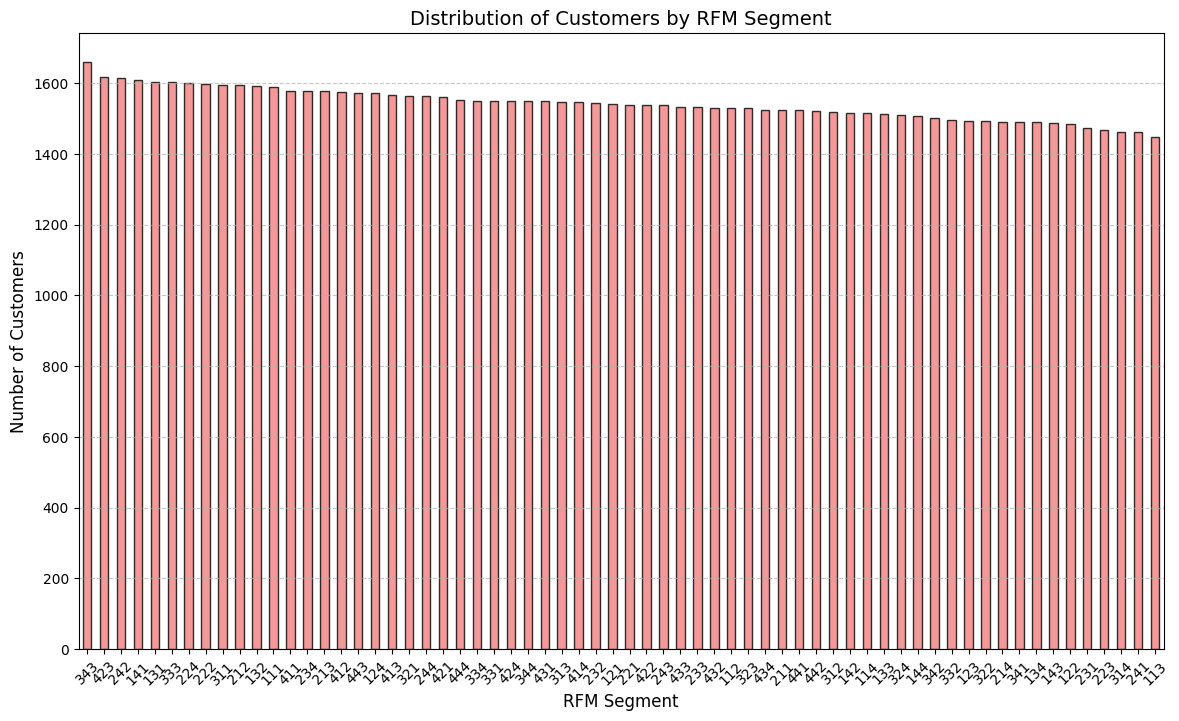

In [107]:
# Visualize distribution of customers by RFM Segment
plt.figure(figsize=(14, 8))
rfm_segment_counts.plot(kind='bar', color='lightcoral', edgecolor='black', alpha=0.8)
plt.title('Distribution of Customers by RFM Segment', fontsize=14)
plt.xlabel('RFM Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

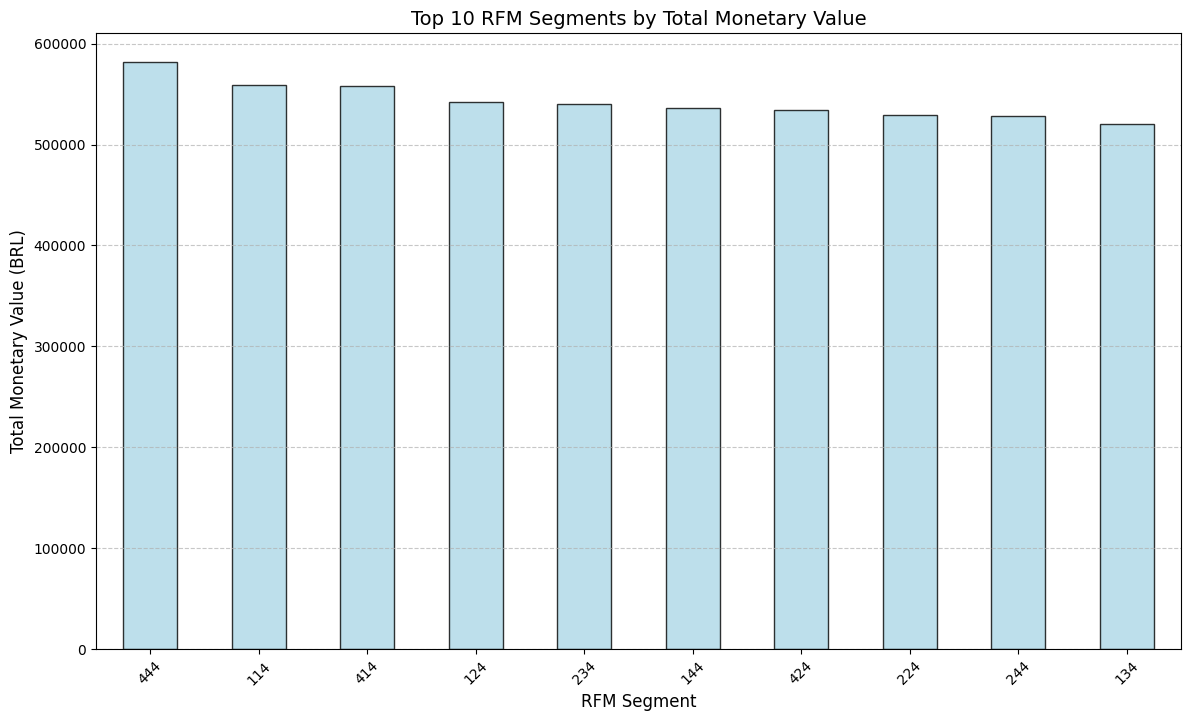

In [108]:
# Analyze total monetary value per RFM Segment
rfm_total_monetary_by_segment = rfm_table.groupby('RFM_Segment')['Monetary'].sum().sort_values(ascending=False)

# Visualize total monetary value per RFM Segment
plt.figure(figsize=(14, 8))
rfm_total_monetary_by_segment.head(10).plot(kind='bar', color='lightblue', edgecolor='black', alpha=0.8)
plt.title('Top 10 RFM Segments by Total Monetary Value', fontsize=14)
plt.xlabel('RFM Segment', fontsize=12)
plt.ylabel('Total Monetary Value (BRL)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

**Hasil Visualisasi RFM Analysis**

1. Distribusi Pelanggan Berdasarkan Segmen RFM:
  - Segmen 343 mendominasi jumlah pelanggan, mencerminkan pelanggan dengan transaksi baru, frekuensi sedang, dan nilai transaksi moderat.
  - Segmen lain seperti 423 dan 242 juga memiliki kontribusi besar.

2. Nilai Total Transaksi Berdasarkan Segmen RFM:
  - Segmen 343 juga mendominasi nilai total transaksi, mencerminkan pengaruh pelanggan baru dengan transaksi moderat.
  - Segmen 433 dan 444 (pelanggan VIP dengan frekuensi tinggi dan nilai transaksi tinggi) menunjukkan kontribusi signifikan pada pendapatan.

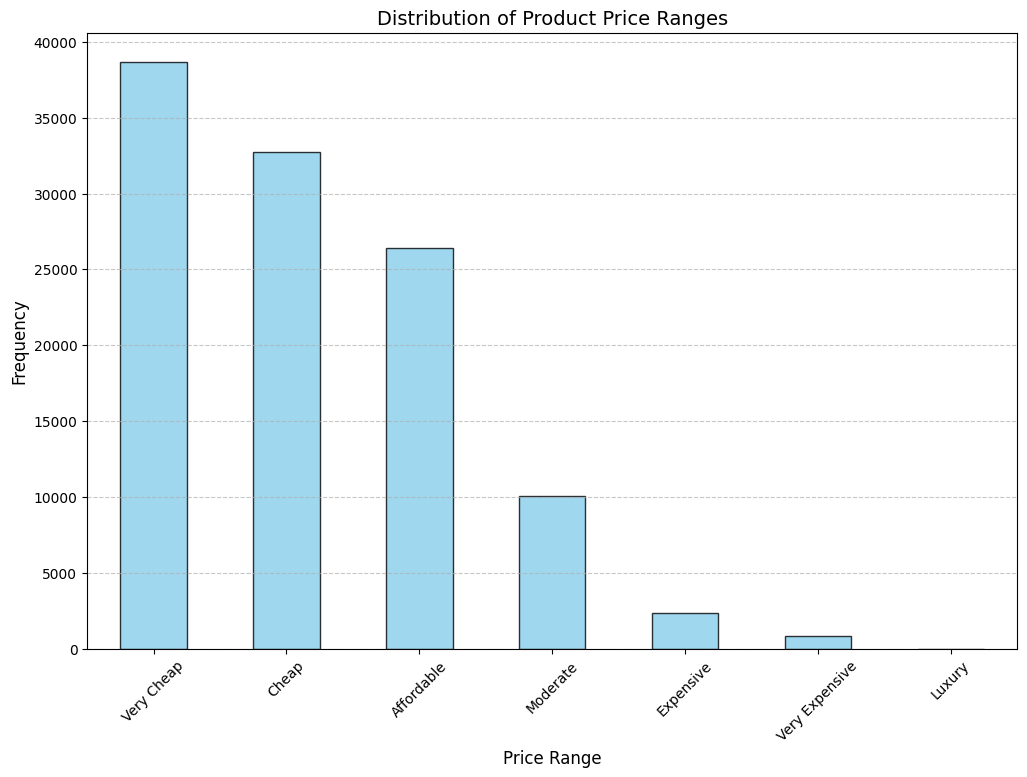

In [109]:
# Create bins for product price ranges
bins = [0, 50, 100, 200, 500, 1000, 5000, float('inf')]
labels = ['Very Cheap', 'Cheap', 'Affordable', 'Moderate', 'Expensive', 'Very Expensive', 'Luxury']
order_items_products['price_range'] = pd.cut(order_items_products['price'], bins=bins, labels=labels, include_lowest=True)

# Analyze the distribution of product prices across the bins
price_range_distribution = order_items_products['price_range'].value_counts()

# Visualize distribution of price ranges
plt.figure(figsize=(12, 8))
price_range_distribution.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Distribution of Product Price Ranges', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

### Clustering

<ipython-input-110-a2663fb73841>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_total_value = order_items_products.groupby('price_range')['price'].sum().sort_values(ascending=False)


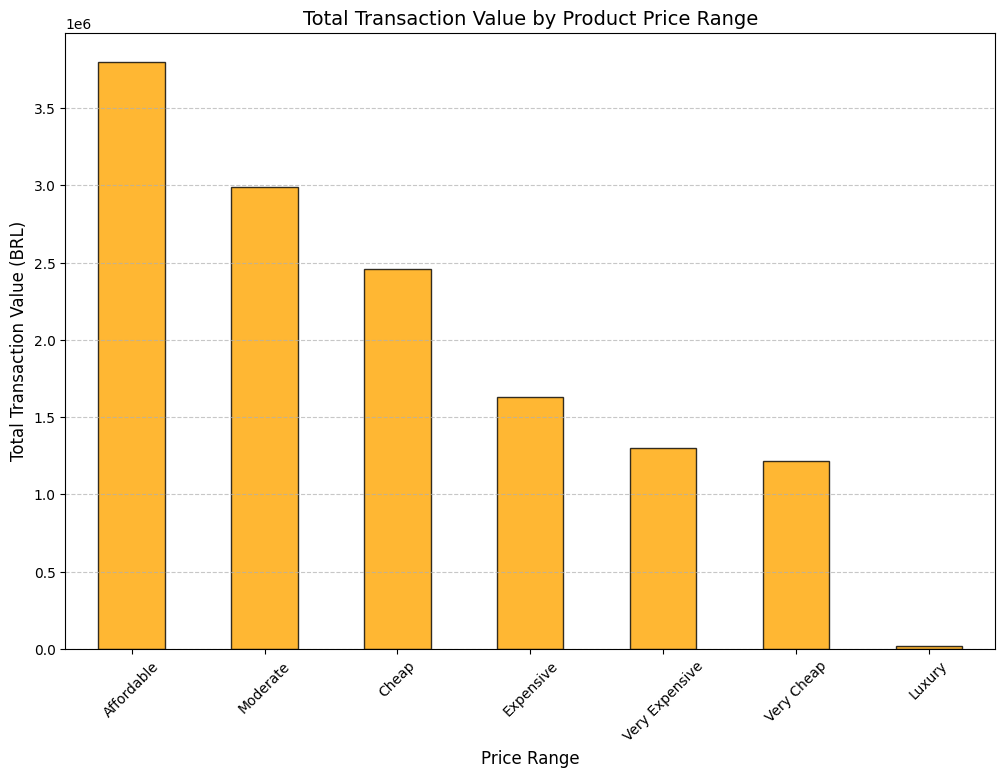

In [110]:
# Group by price range and analyze total transaction value per range
price_range_total_value = order_items_products.groupby('price_range')['price'].sum().sort_values(ascending=False)

# Visualize total transaction value by price range
plt.figure(figsize=(12, 8))
price_range_total_value.plot(kind='bar', color='orange', edgecolor='black', alpha=0.8)
plt.title('Total Transaction Value by Product Price Range', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Total Transaction Value (BRL)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

**Hasil Clustering dengan Binning pada Harga Produk**

1. Distribusi Produk Berdasarkan Rentang Harga:
  - Kategori Dominan:
    - Very Cheap (≤50 BRL) mendominasi jumlah produk yang terjual.
    - Cheap (50-100 BRL) juga memiliki frekuensi tinggi.
  - Produk dengan harga lebih tinggi (Very Expensive atau Luxury) memiliki jumlah yang jauh lebih kecil, mencerminkan produk premium yang jarang dibeli.

2. Total Nilai Transaksi Berdasarkan Rentang Harga:
  - Kategori Luxury (≥5,000 BRL) memiliki total nilai transaksi tertinggi, meskipun frekuensinya rendah, menunjukkan dampak besar dari produk premium pada pendapatan.
  - Kategori Moderate (200-500 BRL) dan Expensive (500-1,000 BRL) juga berkontribusi signifikan pada total transaksi.


**Kesimpulan Clustering**

1. Peluang Strategis:
  - Produk premium (Luxury) meskipun jarang terjual, memberikan kontribusi signifikan terhadap pendapatan.
  - Fokus pada kategori Moderate hingga Very Expensive untuk strategi pengembangan produk bernilai tinggi.

2. Volume dan Nilai:
  - Produk dengan harga rendah (Very Cheap) mendominasi volume transaksi, menunjukkan permintaan untuk barang murah.

## Conclusion

### **Kesimpulan: Proyek Analisis Data E-Commerce Public Dataset**

Proyek ini bertujuan untuk menjawab pertanyaan bisnis utama menggunakan data transaksi e-commerce. Analisis mencakup pengumpulan data, pembersihan, eksplorasi, dan teknik lanjutan seperti Analisis RFM dan Clustering. Berikut adalah ringkasan hasil berdasarkan pertanyaan dan kesimpulan akhir.

---

### **1. Kesimpulan untuk Setiap Pertanyaan Bisnis**

#### **Pertanyaan 1: Kategori produk mana yang paling sering dibeli oleh pelanggan?**
- **Wawasan**:
  - Kategori produk yang paling sering dibeli adalah `bed_bath_table`, `health_beauty`, dan `sports_leisure`.
  - Kategori ini mendominasi frekuensi pembelian dan total nilai transaksi, mencerminkan tingginya permintaan pelanggan.

#### **Pertanyaan 2: Pada bulan apa penjualan cenderung lebih tinggi?**
- **Wawasan**:
  - Penjualan memuncak pada pertengahan tahun 2018, khususnya di bulan Juni dan November, menunjukkan adanya permintaan musiman atau promosi tertentu.
  - Peningkatan bertahap hingga pertengahan 2018 mencerminkan pertumbuhan bisnis yang konsisten sebelum penurunan data.

#### **Pertanyaan 3: Apakah metode pembayaran tertentu cenderung menghasilkan nilai transaksi yang lebih tinggi?**
- **Wawasan**:
  - Kartu kredit memiliki nilai transaksi rata-rata dan total tertinggi, diikuti oleh "boleto."
  - Voucher lebih banyak digunakan untuk pembelian bernilai kecil, memberikan wawasan tentang preferensi pelanggan untuk barang murah.

#### **Pertanyaan 4: Apakah berat produk memengaruhi biaya pengiriman?**
- **Wawasan**:
  - Korelasi positif (**0.61**) menunjukkan bahwa produk yang lebih berat cenderung memiliki biaya pengiriman yang lebih tinggi.
  - Hubungan ini menyoroti perlunya strategi logistik untuk mengoptimalkan pengiriman barang berat.

---

### **2. Kesimpulan Akhir dan Aplikasi Praktis**

#### **Temuan Utama**:
1. **Preferensi Pelanggan**:
   - Tingginya permintaan untuk kategori seperti `bed_bath_table` dan `health_beauty` menunjukkan pentingnya fokus pada inventaris dan strategi pemasaran.
   - Puncak musiman, seperti bulan Juni dan November, memberikan peluang untuk promosi yang ditargetkan.

2. **Efisiensi Operasional**:
   - Wawasan tentang ketergantungan biaya pengiriman pada berat dapat membantu mengoptimalkan strategi logistik dan penentuan harga.
   - Tren metode pembayaran menyoroti perlunya insentif untuk pengguna kartu kredit dan "boleto."

3. **Segmentasi Pelanggan**:
   - Analisis RFM mengungkap segmen pelanggan utama:
     - **Pelanggan VIP**: Pembeli yang sering bertransaksi dengan nilai tinggi (segmen "433" dan "444").
     - **Pelanggan Dormant**: Pelanggan dengan recency rendah yang memerlukan strategi pengaktifan kembali.

4. **Peluang Pendapatan**:
   - Produk mewah, meskipun memiliki volume penjualan rendah, memberikan dampak signifikan pada pendapatan dan dapat ditargetkan untuk kampanye margin tinggi.
   - Produk yang terjangkau mendominasi volume transaksi tetapi memiliki dampak pendapatan yang lebih rendah, memerlukan manajemen inventaris yang seimbang.

#### **Aplikasi Praktis**:
1. **Pemasaran dan Promosi**:
   - Selaraskan kalender promosi dengan bulan penjualan puncak.
   - Gunakan wawasan RFM untuk merancang kampanye personal untuk pelanggan bernilai tinggi dan program re-engagement.

2. **Strategi Produk**:
   - Fokus pada pengembangan kategori berkinerja tinggi sambil mengoptimalkan inventaris untuk produk "Very Cheap" dan "Luxury."

3. **Optimisasi Logistik dan Pembayaran**:
   - Tingkatkan strategi pengiriman untuk barang berat guna meminimalkan biaya.
   - Perluas penawaran metode pembayaran yang sesuai dengan preferensi pelanggan untuk memaksimalkan pendapatan.

---

### **Kesimpulan Akhir**
Analisis ini memberikan wawasan yang dapat ditindaklanjuti untuk meningkatkan retensi pelanggan, mengoptimalkan penawaran produk, dan menyempurnakan strategi pemasaran. Dengan memanfaatkan temuan ini, bisnis dapat meningkatkan efisiensi operasional, pendapatan, dan hubungan pelanggan di pasar yang kompetitif.



## Membuat Dashboard

In [111]:
full_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,4.0,650.0,28.0,9.0,14.0,1,credit_card,2,72.19,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2.0,30000.0,50.0,30.0,40.0,1,credit_card,3,259.83,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2.0,3050.0,33.0,13.0,33.0,1,credit_card,5,216.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,1.0,200.0,16.0,10.0,15.0,1,credit_card,2,25.78,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,1.0,3750.0,35.0,40.0,30.0,1,credit_card,3,218.04,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115889,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,3.0,10150.0,89.0,15.0,40.0,1,boleto,1,343.40,housewares
115890,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,1.0,8950.0,45.0,26.0,38.0,1,boleto,1,386.53,computers_accessories
115891,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,1.0,967.0,21.0,24.0,19.0,1,credit_card,3,116.85,sports_leisure
115892,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,1.0,100.0,20.0,20.0,20.0,1,credit_card,3,64.71,computers_accessories


In [112]:
full_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115894 entries, 0 to 115893
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115894 non-null  object        
 1   order_item_id                  115894 non-null  int64         
 2   product_id                     115894 non-null  object        
 3   seller_id                      115894 non-null  object        
 4   shipping_limit_date            115894 non-null  datetime64[ns]
 5   price                          115894 non-null  float64       
 6   freight_value                  115894 non-null  float64       
 7   customer_id                    115894 non-null  object        
 8   order_status                   115894 non-null  object        
 9   order_purchase_timestamp       115894 non-null  datetime64[ns]
 10  order_approved_at              115880 non-null  datetime64[ns]
 11  

In [113]:
rfm_table  # Data RFM Analysis

,customer_id,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Segment
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80,2,1,3,213
1,000161a058600d5901f007fab4c27140,413,1,54.90,1,1,2,112
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,1,1,4,114
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,1,1,3,113
4,000379cdec625522490c315e70c7a9fb,153,1,93.00,3,1,3,313
...,...,...,...,...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,170,1,78.00,3,4,2,342
98662,fffecc9f79fd8c764f843e9951b11341,157,1,54.90,3,4,2,342
98663,fffeda5b6d849fbd39689bb92087f431,103,1,47.90,4,4,2,442
98664,ffff42319e9b2d713724ae527742af25,81,1,199.90,4,4,4,444


In [114]:
!pip install streamlit babel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [115]:
!pip install streamlit pyngrok

In [116]:
# Simpan dataset ke file CSV
full_merged.to_csv("full_merged.csv", index=False)
rfm_table.to_csv("rfm_table.csv", index=False)

In [117]:
%%writefile dashboard.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
sns.set(style='dark')

# Load Data
full_merged = pd.read_csv("full_merged.csv")
rfm_table = pd.read_csv("rfm_table.csv")

st.title("E-commerce Data Analysis Dashboard")
st.sidebar.title("Navigation")

# Sidebar Navigation
page = st.sidebar.selectbox(
    "Choose a Page",
    ["Home", "Product Analysis", "Sales Trends", "Payment Insights", "RFM Segmentation", "Advanced Visualizations"]
)

# Home Page
if page == "Home":
    st.header("Project Overview")
    st.write("""
        Welcome to the E-commerce Data Analysis Dashboard.
        This dashboard provides insights into product categories, sales trends, payment methods, and customer segmentation.
    """)
    # Summary Statistics
    total_transactions = len(full_merged)
    total_customers = rfm_table['customer_id'].nunique()
    avg_transaction_value = full_merged['price'].mean()

    st.subheader("Summary Statistics")
    st.write(f"**Total Transactions:** {total_transactions}")
    st.write(f"**Total Customers:** {total_customers}")
    st.write(f"**Average Transaction Value:** {avg_transaction_value:.2f} BRL")

# Product Analysis
elif page == "Product Analysis":
    st.header("Product Analysis")
    st.subheader("Top Product Categories by Purchase Frequency")
    top_categories = full_merged['product_category_name_english'].value_counts().head(10)
    st.bar_chart(top_categories)


    st.subheader("Top Product Categories by Total Transaction Value")
    category_total_value = full_merged.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False)
    st.bar_chart(category_total_value.head(10))

# Sales Trends
elif page == "Sales Trends":
    st.header("Sales Trends")
    st.subheader("Monthly Sales Trends")
    sales_trends = full_merged.groupby('order_month').size()
    st.line_chart(sales_trends)

# Payment Insights
elif page == "Payment Insights":
    st.header("Payment Insights")
    st.subheader("Average Payment Value by Payment Type")
    avg_payment_value_by_type = full_merged.groupby('payment_type')['payment_value'].mean()
    st.bar_chart(avg_payment_value_by_type)

    st.subheader("Total Payment Value by Payment Type")
    total_payment_value_by_type = full_merged.groupby('payment_type')['payment_value'].sum()
    st.bar_chart(total_payment_value_by_type)

# RFM Segmentation
elif page == "RFM Segmentation":
    st.header("RFM Segmentation")
    st.subheader("Customer Distribution by RFM Segment")
    rfm_segment_counts = rfm_table['RFM_Segment'].value_counts()
    st.bar_chart(rfm_segment_counts)

    st.subheader("Top RFM Segments by Total Monetary Value")
    rfm_total_monetary_by_segment = rfm_table.groupby('RFM_Segment')['Monetary'].sum().sort_values(ascending=False)
    st.bar_chart(rfm_total_monetary_by_segment.head(10))

# Advanced Visualizations
elif page == "Advanced Visualizations":
    st.header("Advanced Visualizations")
    st.subheader("Scatter Plot: Product Weight vs Freight Value")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=full_merged,
        x='product_weight_g',
        y='freight_value',
        alpha=0.6
    )
    plt.title("Product Weight vs Freight Value")
    plt.xlabel("Product Weight (grams)")
    plt.ylabel("Freight Value (BRL)")
    st.pyplot(plt)

    st.subheader("Heatmap: Payment Type by Order Status")
    heatmap_data = full_merged.pivot_table(
        index='payment_type', columns='order_status', values='payment_value', aggfunc='sum'
    )
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Blues")
    plt.title("Payment Type by Order Status (Total Payment Value)")
    st.pyplot(plt)

st.write("Thank you for exploring the dashboard!")


Writing dashboard.py


In [118]:
!ngrok config add-authtoken 2qIjCUpA5pSni4W3uQBMqbhwSe3_4noEKMFoZBUefMQMY4UGN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [119]:
from pyngrok import ngrok

# Jalankan Streamlit di latar belakang
!streamlit run dashboard.py &> /dev/null &

# Sambungkan ke ngrok untuk URL publik
public_url = ngrok.connect(addr="8501", proto="http")
print(f"Streamlit dashboard is available at: {public_url}")


Streamlit dashboard is available at: NgrokTunnel: "https://82d4-34-85-207-135.ngrok-free.app" -> "http://localhost:8501"


## Requirement

In [120]:
!pip freeze > requirements.txt